# Data Analysis

# Notebook set-up

In [276]:
import os 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
import io
import statistics as stat
import statsmodels.api as sm
from statsmodels.api import OLS
import random
import statsmodels.formula.api as smf
import scipy as sp
import scipy.stats
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from pandas.tools.plotting import scatter_matrix, radviz

sns.set_style('whitegrid')
sns.set_context('notebook')

# Data loading

In [277]:
# Load the data into a dataframe 
#can_master = pd.read_csv('can-1996-2016.csv')
#cmte_master =pd.read_csv('cm-1996-2014.csv') 
#opex=pd.read_csv('opex-2004-2014.csv')
#oth=pd.read_csv('oth-1996-2014.csv')
#exp=pd.read_csv('expresults_rev.csv')
#election_spend=pd.read_csv('catall.csv')
#results = pd.read_csv('candr.csv')
#catsort= pd.read_csv('catsort_rev.csv')
cost_vote = pd.read_csv('combined_all.csv')

In [278]:
cost_vote.head()

,cand_id,cycle,c1,c2,c3,c4,c5,c6,c7,c8,...,incumbent,party,primary_votes,runoff_votes,general_votes,ge_runoff_election_votes,ge_winner_indicator,total_votes,totalspend,costpervote
0,H0AK00089,2010,550.00,0.00,0.00,0.00,0.0,785.00,0.00,0.0,...,0,DEM,38673.0,0.0,77606.0,0.0,0,116279.0,220001.06,1.892010
1,H0AK01038,2010,1569.23,88.93,0.00,0.00,0.0,0.00,0.00,0.0,...,0,REP,24709.0,0.0,0.0,0.0,0,24709.0,169777.74,6.871089
2,H0AL00016,2010,19831.34,909.80,81.19,465.00,0.0,3177.55,2192.99,0.0,...,0,DEM,6672.0,0.0,0.0,0.0,0,6672.0,26957.87,4.040448
3,H0AL01030,2010,7054.34,5233.32,668.95,27082.28,1175.0,1295.21,583.75,0.0,...,0,REP,18725.0,0.0,0.0,0.0,0,18725.0,44377.00,2.369933
4,H0AL01030,2012,3480.00,27.72,381.09,7257.71,0.0,0.00,56.58,0.0,...,0,R,3854.0,0.0,0.0,0.0,0,3854.0,11203.10,2.906876


In [279]:
cost_vote.dtypes

cand_id                      object
cycle                         int64
c1                          float64
c2                          float64
c3                          float64
c4                          float64
c5                          float64
c6                          float64
c7                          float64
c8                          float64
c9                          float64
c10                         float64
c11                         float64
c12                         float64
c13                         float64
state_abbreviation           object
district                     object
incumbent                    object
party                        object
primary_votes               float64
runoff_votes                float64
general_votes               float64
ge_runoff_election_votes    float64
ge_winner_indicator          object
total_votes                 float64
totalspend                  float64
costpervote                 float64
dtype: object

In [280]:
cost_vote['total_votes']=cost_vote['total_votes'].fillna(0)

In [281]:
cost_vote['totalspend']=cost_vote['totalspend'].fillna(0)

In [282]:
cost_vote['incumbent']=cost_vote['incumbent'].fillna(0)

In [283]:
cost_vote['party']=cost_vote['party'].fillna('None')

In [284]:
cost_vote = cost_vote.drop(['costpervote'], axis=1)

In [285]:
cost_vote['totalspend']=pd.to_numeric(cost_vote['totalspend'],errors='coerce')

In [286]:
print(cost_vote[pd.to_numeric(cost_vote['totalspend'], errors = 'coerce').isnull()])

Empty DataFrame
Columns: [cand_id, cycle, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, state_abbreviation, district, incumbent, party, primary_votes, runoff_votes, general_votes, ge_runoff_election_votes, ge_winner_indicator, total_votes, totalspend]
Index: []

[0 rows x 26 columns]


In [287]:
cost_vote['total_votes']=pd.to_numeric(cost_vote['total_votes'],errors='coerce')

In [288]:
print(cost_vote[pd.to_numeric(cost_vote['total_votes'], errors = 'coerce').isnull()])

Empty DataFrame
Columns: [cand_id, cycle, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, state_abbreviation, district, incumbent, party, primary_votes, runoff_votes, general_votes, ge_runoff_election_votes, ge_winner_indicator, total_votes, totalspend]
Index: []

[0 rows x 26 columns]


In [289]:
cost_vote['cycle']=pd.to_numeric(cost_vote['cycle'],errors='coerce')

In [290]:
print(cost_vote[pd.to_numeric(cost_vote['cycle'], errors = 'coerce').isnull()])

Empty DataFrame
Columns: [cand_id, cycle, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, state_abbreviation, district, incumbent, party, primary_votes, runoff_votes, general_votes, ge_runoff_election_votes, ge_winner_indicator, total_votes, totalspend]
Index: []

[0 rows x 26 columns]


In [291]:
cost_vote = cost_vote[cost_vote.total_votes != 0]

In [292]:
cost_vote.loc[cost_vote['totalspend'] == 0]

,cand_id,cycle,c1,c2,c3,c4,c5,c6,c7,c8,...,district,incumbent,party,primary_votes,runoff_votes,general_votes,ge_runoff_election_votes,ge_winner_indicator,total_votes,totalspend
9107,H4TN09055,2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9,0,DEM,122.0,0.0,0.0,0.0,0,122.0,0.0
9853,H6VA10191,2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,0,IND,0.0,0.0,1851.0,0.0,0,1851.0,0.0
10982,S4MD00160,2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,S,0,REP,4110.0,0.0,0.0,0.0,0,4110.0,0.0
11505,H6LA02207,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,LBT,0.0,0.0,549.0,0.0,0,549.0,0.0
11506,H8NJ02133,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,RTB,0.0,0.0,1312.0,0.0,0,1312.0,0.0
11507,H0NJ02098,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,SUS,0.0,0.0,648.0,0.0,0,648.0,0.0
11508,H6RI01104,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,I,0.0,0.0,15108.0,0.0,0,15108.0,0.0
11509,H4AL02063,2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,D,0.0,0.0,70562.0,0.0,0,70562.0,0.0
11510,H2AL05078,2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,0,D,4393.0,0.0,0.0,0.0,0,4393.0,0.0
11511,H4AL05066,2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,0,R,6742.0,2371.0,74145.0,0.0,0,83258.0,0.0


In [293]:
cost_vote = cost_vote.rename(columns = {'ge_winner_indicator':'winner'})

In [294]:
cost_vote['costvote'] = cost_vote['totalspend']/cost_vote['total_votes']

In [295]:
cost_vote.mean()

cycle                         2009.142466
c1                           82813.309249
c2                            2937.686044
c3                           24862.413532
c4                           77011.650229
c5                            4297.670139
c6                            7494.260491
c7                            2807.764581
c8                             115.423473
c9                              45.622999
c10                             83.920067
c11                            748.612873
c12                            287.573776
c13                         402798.463396
primary_votes                20683.139878
runoff_votes                   441.977017
general_votes                76868.068037
ge_runoff_election_votes       232.190030
total_votes                  98225.374962
totalspend                  606188.947376
costvote                      2662.593130
dtype: float64

In [296]:
cost_vote['cycle'] = cost_vote['cycle'].astype(int).astype('str')

In [297]:
cost_vote.describe()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,primary_votes,runoff_votes,general_votes,ge_runoff_election_votes,total_votes,totalspend,costvote
count,1.314000e+04,13140.000000,1.314000e+04,1.314000e+04,13140.000000,1.314000e+04,1.314000e+04,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,1.314000e+04,1.314000e+04,13140.000000,1.314000e+04,1.314000e+04,1.314000e+04,1.314000e+04,1.314000e+04
mean,8.281331e+04,2937.686044,2.486241e+04,7.701165e+04,4297.670139,7.494260e+03,2.807765e+03,115.423473,45.622999,83.920067,748.612873,287.573776,4.027985e+05,2.068314e+04,441.977017,7.686807e+04,2.321900e+02,9.822537e+04,6.061889e+05,2.662593e+03
std,4.662288e+05,13721.331612,1.365725e+05,5.160868e+05,19948.936705,4.880747e+04,2.082310e+04,5068.014913,875.780998,2216.931541,8543.058359,3322.745012,1.545528e+06,6.919007e+04,8472.866811,2.632518e+05,1.354564e+04,3.218754e+05,1.821591e+06,1.123215e+05
min,-7.637000e+02,-390.000000,-1.900000e-01,-7.500000e+02,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-5000.000000,0.000000,0.000000,-4.920380e+04,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,4.663000e+03,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2.125160e+03,5.676000e+03,0.000000,6.505000e+03,0.000000e+00,1.617900e+04,3.202793e+04,1.441572e+00
75%,1.417877e+04,68.235000,2.014810e+03,4.148600e+03,0.000000,3.873775e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.517188e+05,2.091725e+04,0.000000,1.013965e+05,0.000000e+00,1.238395e+05,5.978935e+05,7.717508e+00
max,2.545184e+07,527439.630000,8.283133e+06,2.546524e+07,777330.090000,2.290329e+06,1.000230e+06,500000.000000,43129.070000,164844.000000,407000.000000,117400.000000,3.943196e+07,2.566298e+06,631812.000000,7.864624e+06,1.228033e+06,1.025745e+07,4.955574e+07,7.044762e+06


In [298]:
cost_vote['party'] = cost_vote['party'].astype('str')

In [299]:
cost_vote = cost_vote.replace("DEM","D")

In [300]:
cost_vote = cost_vote.replace("DEM ","D")

In [301]:
cost_vote = cost_vote.replace("REP","R")

In [302]:
cost_vote = cost_vote.replace("REP ","R")

In [303]:
TestR = cost_vote[cost_vote['party'] == "R"]

In [304]:
TestD = cost_vote[cost_vote['party'] == "D"]

In [305]:
testframes = [TestR, TestD]

result = pd.concat(testframes)

In [306]:
result.head()

,cand_id,cycle,c1,c2,c3,c4,c5,c6,c7,c8,...,incumbent,party,primary_votes,runoff_votes,general_votes,ge_runoff_election_votes,winner,total_votes,totalspend,costvote
1,H0AK01038,2010,1569.23,88.93,0.00,0.00,0.0,0.00,0.00,0.0,...,0,R,24709.0,0.0,0.0,0.0,0,24709.0,169777.74,6.871089
3,H0AL01030,2010,7054.34,5233.32,668.95,27082.28,1175.0,1295.21,583.75,0.0,...,0,R,18725.0,0.0,0.0,0.0,0,18725.0,44377.00,2.369933
4,H0AL01030,2012,3480.00,27.72,381.09,7257.71,0.0,0.00,56.58,0.0,...,0,R,3854.0,0.0,0.0,0.0,0,3854.0,11203.10,2.906876
5,H0AL02087,2012,11727.82,0.00,16964.09,0.00,0.0,0.00,0.00,0.0,...,1,R,0.0,0.0,180591.0,0.0,1,180591.0,694953.98,3.848220
6,H0AL02087,2014,12132.25,0.00,16866.78,0.00,0.0,0.00,0.00,0.0,...,1,R,0.0,0.0,113103.0,0.0,1,113103.0,570473.48,5.043840


In [307]:
Gen = result

In [308]:
Gen.head()

,cand_id,cycle,c1,c2,c3,c4,c5,c6,c7,c8,...,incumbent,party,primary_votes,runoff_votes,general_votes,ge_runoff_election_votes,winner,total_votes,totalspend,costvote
1,H0AK01038,2010,1569.23,88.93,0.00,0.00,0.0,0.00,0.00,0.0,...,0,R,24709.0,0.0,0.0,0.0,0,24709.0,169777.74,6.871089
3,H0AL01030,2010,7054.34,5233.32,668.95,27082.28,1175.0,1295.21,583.75,0.0,...,0,R,18725.0,0.0,0.0,0.0,0,18725.0,44377.00,2.369933
4,H0AL01030,2012,3480.00,27.72,381.09,7257.71,0.0,0.00,56.58,0.0,...,0,R,3854.0,0.0,0.0,0.0,0,3854.0,11203.10,2.906876
5,H0AL02087,2012,11727.82,0.00,16964.09,0.00,0.0,0.00,0.00,0.0,...,1,R,0.0,0.0,180591.0,0.0,1,180591.0,694953.98,3.848220
6,H0AL02087,2014,12132.25,0.00,16866.78,0.00,0.0,0.00,0.00,0.0,...,1,R,0.0,0.0,113103.0,0.0,1,113103.0,570473.48,5.043840


In [309]:
Gen['party'].unique()

array(['R', 'D'], dtype=object)

In [310]:
Gen['party'].count()

9591

In [312]:
Gen = Gen.replace("W (Runoff)","0")

In [313]:
Gen['winner'].unique()

array(['0', '1', 'WW', 'Dd'], dtype=object)

In [314]:
Gen = Gen.replace("WW","0")
Gen = Gen.replace("Dd","0")

In [315]:
Gen['winner'].value_counts()

0    6972
1    2619
Name: winner, dtype: int64

## Scores for Democrats (blue font unintentional) 

In [316]:
Winner = Gen[Gen['winner'].isin(['1'])]

In [317]:
Loser = Gen[Gen['winner'].isin(['0'])]

In [318]:
Dem = Gen[Gen['party'].isin(['D'])]

In [319]:
Dem.head(100)

,cand_id,cycle,c1,c2,c3,c4,c5,c6,c7,c8,...,incumbent,party,primary_votes,runoff_votes,general_votes,ge_runoff_election_votes,winner,total_votes,totalspend,costvote
0,H0AK00089,2010,550.00,0.00,0.00,0.00,0.00,785.00,0.00,0.0,...,0,D,38673.0,0.0,77606.0,0.0,0,116279.0,220001.06,1.892010
2,H0AL00016,2010,19831.34,909.80,81.19,465.00,0.00,3177.55,2192.99,0.0,...,0,D,6672.0,0.0,0.0,0.0,0,6672.0,26957.87,4.040448
9,H0AL03184,2010,14.95,1441.91,0.00,5000.00,0.00,2293.50,0.00,0.0,...,0,D,0.0,0.0,80204.0,0.0,0,80204.0,8750.36,0.109101
17,H0AL05171,2010,8174.82,0.00,0.00,40231.96,0.00,5993.05,0.00,0.0,...,0,D,5277.0,0.0,0.0,0.0,0,5277.0,73326.19,13.895431
18,H0AL05189,2010,1082.20,0.00,0.00,0.00,0.00,0.00,205.00,0.0,...,0,D,10262.0,0.0,0.0,0.0,0,10262.0,371549.54,36.206348
19,H0AL07086,2010,717735.35,38988.03,52236.78,690997.05,55500.00,50828.50,31230.29,0.0,...,0,D,31531.0,32366.0,136696.0,0.0,1,200593.0,1673438.30,8.342456
20,H0AL07086,2012,329788.25,48925.15,65657.68,23994.00,0.00,40971.17,140490.99,0.0,...,1,D,0.0,0.0,232520.0,0.0,1,232520.0,661131.32,2.843331
21,H0AL07086,2014,425989.76,57266.94,116612.17,303683.52,30000.00,58571.83,166933.55,0.0,...,1,D,74953.0,0.0,133687.0,0.0,1,208640.0,1165162.70,5.584560
27,H0AR01109,2010,70562.30,5872.99,17720.93,303707.61,26000.00,6671.16,829.76,0.0,...,0,D,25854.0,39402.0,78267.0,0.0,0,143523.0,1562558.79,10.887166
32,H0AR01133,2010,23613.76,4421.00,7982.82,24139.31,0.00,2046.19,250.00,0.0,...,0,D,14158.0,0.0,0.0,0.0,0,14158.0,62985.08,4.448727


In [320]:
DemW = Dem[Dem['winner'].isin(['1'])] #table of Democrats who won
DemW.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,1276.0,1.196553e+05,3.499033e+05,0.00,0.000000,0.000000,1.166739e+05,7.071784e+06
c2,1276.0,6.023805e+03,1.994351e+04,0.00,0.000000,0.000000,2.662888e+03,2.893896e+05
c3,1276.0,4.665855e+04,1.865544e+05,0.00,0.000000,0.000000,4.139726e+04,5.594799e+06
c4,1276.0,1.437402e+05,9.435392e+05,-750.00,0.000000,0.000000,5.582160e+03,2.546524e+07
c5,1276.0,9.622990e+03,4.155677e+04,0.00,0.000000,0.000000,0.000000e+00,7.773301e+05
c6,1276.0,1.540418e+04,8.301589e+04,0.00,0.000000,0.000000,1.006145e+03,2.290329e+06
c7,1276.0,6.228690e+03,3.413818e+04,0.00,0.000000,0.000000,9.537500e+02,1.000230e+06
c8,1276.0,2.812097e+02,5.946364e+03,0.00,0.000000,0.000000,0.000000e+00,1.800000e+05
c9,1276.0,1.156063e+02,1.605300e+03,0.00,0.000000,0.000000,0.000000e+00,4.312907e+04
c10,1276.0,7.334723e+01,5.164786e+02,-400.00,0.000000,0.000000,0.000000e+00,9.300000e+03


In [321]:
DemWInc = DemW[DemW['incumbent'].isin(['1'])] #table of Democrat Incumbent who won
DemWInc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,1087.0,1.026763e+05,2.671894e+05,0.00,0.000000,0.000000,1.027966e+05,4.238332e+06
c2,1087.0,5.979199e+03,2.053124e+04,0.00,0.000000,0.000000,2.376545e+03,2.893896e+05
c3,1087.0,4.293688e+04,1.024982e+05,0.00,0.000000,0.000000,4.164648e+04,1.404384e+06
c4,1087.0,9.158746e+04,5.458992e+05,-750.00,0.000000,0.000000,3.789995e+03,9.983008e+06
c5,1087.0,6.392052e+03,2.845785e+04,0.00,0.000000,0.000000,0.000000e+00,5.923005e+05
c6,1087.0,8.518126e+03,3.579319e+04,0.00,0.000000,0.000000,4.404300e+02,5.160952e+05
c7,1087.0,6.308618e+03,3.632292e+04,0.00,0.000000,0.000000,3.500000e+02,1.000230e+06
c8,1087.0,2.369914e+02,5.670660e+03,0.00,0.000000,0.000000,0.000000e+00,1.800000e+05
c9,1087.0,1.096448e+02,1.595682e+03,0.00,0.000000,0.000000,0.000000e+00,4.312907e+04
c10,1087.0,5.916751e+01,4.638187e+02,-400.00,0.000000,0.000000,0.000000e+00,9.300000e+03


In [322]:
DemWC = DemW[DemW['incumbent'].isin(['0'])] #table of Democrat challengers who won
DemWC.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,189.0,2.173069e+05,6.377146e+05,0.0,0.000000e+00,1.482702e+04,2.419927e+05,7.071784e+06
c2,189.0,6.280352e+03,1.619774e+04,0.0,0.000000e+00,0.000000e+00,5.808280e+03,1.713475e+05
c3,189.0,6.806307e+04,4.180896e+05,0.0,0.000000e+00,1.889180e+03,3.996882e+04,5.594799e+06
c4,189.0,4.436876e+05,2.051847e+06,0.0,0.000000e+00,0.000000e+00,1.925995e+05,2.546524e+07
c5,189.0,2.820516e+04,8.140312e+04,0.0,0.000000e+00,0.000000e+00,2.980000e+04,7.773301e+05
c6,189.0,5.500807e+04,1.936152e+05,0.0,0.000000e+00,0.000000e+00,3.039067e+04,2.290329e+06
c7,189.0,5.768997e+03,1.679647e+04,0.0,0.000000e+00,0.000000e+00,4.455460e+03,1.877644e+05
c8,189.0,5.355238e+02,7.346603e+03,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.010000e+05
c9,189.0,1.498926e+02,1.663471e+03,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.218561e+04
c10,189.0,1.548994e+02,7.473431e+02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,8.313270e+03


In [323]:
DemL = Dem[Dem['winner'].isin(['0'])] #table of Democrats who won
DemL.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,3151.0,40985.078378,1.801535e+05,0.0,0.0,0.00000,10900.420000,4.360481e+06
c2,3151.0,1624.891419,8.674676e+03,-390.0,0.0,0.00000,178.985000,2.932756e+05
c3,3151.0,8262.038013,3.697088e+04,0.0,0.0,0.00000,1075.155000,7.080864e+05
c4,3151.0,50329.976033,2.733236e+05,-324.0,0.0,0.00000,3988.595000,8.772151e+06
c5,3151.0,3401.162047,1.430501e+04,0.0,0.0,0.00000,0.000000,2.048548e+05
c6,3151.0,6771.307001,4.162425e+04,0.0,0.0,0.00000,1357.710000,1.534658e+06
c7,3151.0,1172.278731,6.418374e+03,0.0,0.0,0.00000,0.000000,1.525661e+05
c8,3151.0,9.730121,2.638676e+02,0.0,0.0,0.00000,0.000000,1.137500e+04
c9,3151.0,50.896014,7.675554e+02,0.0,0.0,0.00000,0.000000,2.284800e+04
c10,3151.0,113.061196,2.591217e+03,0.0,0.0,0.00000,0.000000,1.301953e+05


In [324]:
DemLInc = DemL[DemL['incumbent'].isin(['1'])] #table of Democrat Incumbent who lose
DemLInc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,153.0,1.859267e+05,5.007985e+05,0.0,0.000000,0.000000e+00,1.552438e+05,4.104223e+06
c2,153.0,7.539058e+03,2.389298e+04,-390.0,0.000000,0.000000e+00,5.892470e+03,2.564344e+05
c3,153.0,5.015068e+04,1.104671e+05,0.0,0.000000,0.000000e+00,4.608711e+04,6.066072e+05
c4,153.0,2.446683e+05,8.847693e+05,0.0,0.000000,0.000000e+00,4.648100e+03,8.772151e+06
c5,153.0,1.308092e+04,3.498788e+04,0.0,0.000000,0.000000e+00,0.000000e+00,2.048548e+05
c6,153.0,1.458287e+04,5.460518e+04,0.0,0.000000,0.000000e+00,9.750000e+02,5.585654e+05
c7,153.0,4.799687e+03,1.762962e+04,0.0,0.000000,0.000000e+00,7.000000e+02,1.493258e+05
c8,153.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
c9,153.0,2.614333e+01,2.259533e+02,0.0,0.000000,0.000000e+00,0.000000e+00,2.000000e+03
c10,153.0,4.572065e+02,4.078920e+03,0.0,0.000000,0.000000e+00,0.000000e+00,4.983207e+04


In [325]:
DemLC = DemL[DemL['incumbent'].isin(['0'])] #table of Democrat Incumbent who lose
DemLC.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,2997.0,33599.332009,1.423779e+05,0.0,0.0,0.000000,10022.80000,4.360481e+06
c2,2997.0,1323.509169,6.948173e+03,0.0,0.0,0.000000,125.00000,2.932756e+05
c3,2997.0,6126.335712,2.690356e+04,0.0,0.0,0.000000,900.00000,7.080864e+05
c4,2997.0,40425.593277,1.918396e+05,-324.0,0.0,0.000000,3977.19000,4.025618e+06
c5,2997.0,2908.135102,1.216608e+04,0.0,0.0,0.000000,0.00000,1.923870e+05
c6,2997.0,6374.777838,4.082978e+04,0.0,0.0,0.000000,1363.62000,1.534658e+06
c7,2997.0,987.486894,5.180547e+03,0.0,0.0,0.000000,0.00000,1.525661e+05
c8,2997.0,10.230100,2.705548e+02,0.0,0.0,0.000000,0.00000,1.137500e+04
c9,2997.0,52.176647,7.853663e+02,0.0,0.0,0.000000,0.00000,2.284800e+04
c10,2997.0,95.529943,2.491803e+03,0.0,0.0,0.000000,0.00000,1.301953e+05


In [326]:
Rep = Gen[Gen['party'].isin(['R'])]

In [327]:
Rep.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,5164.0,122188.211272,6.582326e+05,-763.70,0.00,0.00000,45380.317500,2.545184e+07
c2,5164.0,3836.246371,1.505642e+04,-225.73,0.00,0.00000,638.632500,5.274396e+05
c3,5164.0,38467.869557,1.850177e+05,0.00,0.00,0.00000,7878.702500,8.283133e+06
c4,5164.0,88234.925778,4.423683e+05,0.00,0.00,0.00000,17342.057500,1.811699e+07
c5,5164.0,4793.979988,1.740721e+04,0.00,0.00,0.00000,0.000000,3.169784e+05
c6,5164.0,7933.562899,4.388370e+04,0.00,0.00,0.00000,1555.832500,1.872233e+06
c7,5164.0,3660.536388,1.977324e+04,0.00,0.00,0.00000,488.052500,8.582995e+05
c8,5164.0,213.513110,7.515204e+03,0.00,0.00,0.00000,0.000000,5.000000e+05
c9,5164.0,50.902897,9.653006e+02,0.00,0.00,0.00000,0.000000,4.000000e+04
c10,5164.0,83.379266,2.582971e+03,-5000.00,0.00,0.00000,0.000000,1.648440e+05


In [328]:
RepW = Rep[Rep['winner'].isin(['1'])]
RepW.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,1343.0,2.550955e+05,5.904812e+05,0.00,0.000000,22566.930000,3.039412e+05,8.853032e+06
c2,1343.0,8.778354e+03,2.425464e+04,0.00,0.000000,0.000000,7.837160e+03,5.274396e+05
c3,1343.0,8.797131e+04,2.007861e+05,0.00,0.000000,5112.830000,1.072874e+05,3.066642e+06
c4,1343.0,1.490150e+05,4.901765e+05,0.00,0.000000,0.000000,8.461179e+04,1.223820e+07
c5,1343.0,9.816836e+03,2.485940e+04,0.00,0.000000,0.000000,6.450000e+03,3.169784e+05
c6,1343.0,9.770212e+03,3.381723e+04,0.00,0.000000,0.000000,2.176905e+03,4.990009e+05
c7,1343.0,7.447657e+03,2.147183e+04,0.00,0.000000,0.000000,3.823845e+03,3.121001e+05
c8,1343.0,6.811223e+02,1.433880e+04,0.00,0.000000,0.000000,0.000000e+00,5.000000e+05
c9,1343.0,8.252614e+01,1.367479e+03,0.00,0.000000,0.000000,0.000000e+00,3.620453e+04
c10,1343.0,2.345394e+02,4.956254e+03,0.00,0.000000,0.000000,0.000000e+00,1.648440e+05


In [329]:
RepWInc = RepW[RepW['incumbent'].isin(['1'])]
RepWInc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,1103.0,2.383260e+05,5.496448e+05,0.00,0.000000,12751.740000,2.803084e+05,8.853032e+06
c2,1103.0,8.225978e+03,2.021406e+04,0.00,0.000000,0.000000,7.231035e+03,1.804328e+05
c3,1103.0,8.783846e+04,1.967705e+05,0.00,0.000000,4055.500000,1.108841e+05,3.066642e+06
c4,1103.0,1.028566e+05,2.828538e+05,0.00,0.000000,0.000000,4.975975e+04,2.836189e+06
c5,1103.0,8.577285e+03,2.248946e+04,0.00,0.000000,0.000000,1.559465e+03,3.169784e+05
c6,1103.0,8.526087e+03,3.272584e+04,0.00,0.000000,0.000000,1.537825e+03,4.990009e+05
c7,1103.0,7.479397e+03,2.210067e+04,0.00,0.000000,0.000000,3.639395e+03,3.121001e+05
c8,1103.0,7.965764e+02,1.580315e+04,0.00,0.000000,0.000000,0.000000e+00,5.000000e+05
c9,1103.0,8.190818e+01,1.455309e+03,0.00,0.000000,0.000000,0.000000e+00,3.620453e+04
c10,1103.0,2.166360e+02,5.053319e+03,0.00,0.000000,0.000000,0.000000e+00,1.648440e+05


In [330]:
RepWC = Rep[Rep['incumbent'].isin(['0'])]
RepWC.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,3939.0,83604.949853,6.783743e+05,-763.70,0.0,0.000000,18941.590000,2.545184e+07
c2,3939.0,2312.564496,1.172619e+04,-225.73,0.0,0.000000,315.245000,5.274396e+05
c3,3939.0,20273.539200,1.209841e+05,0.00,0.0,0.000000,2843.475000,3.821741e+06
c4,3939.0,75720.571513,4.527602e+05,0.00,0.0,0.000000,13068.500000,1.811699e+07
c5,3939.0,3369.848926,1.405001e+04,0.00,0.0,0.000000,0.000000,2.734362e+05
c6,3939.0,7510.784717,4.579662e+04,0.00,0.0,0.000000,1551.675000,1.872233e+06
c7,3939.0,2345.230104,1.714629e+04,0.00,0.0,0.000000,261.415000,8.582995e+05
c8,3939.0,20.959645,5.512467e+02,0.00,0.0,0.000000,0.000000,2.279056e+04
c9,3939.0,43.797370,7.928360e+02,0.00,0.0,0.000000,0.000000,4.000000e+04
c10,3939.0,46.918195,1.260492e+03,-5000.00,0.0,0.000000,0.000000,6.953224e+04


In [331]:
RepL = Rep[Rep['winner'].isin(['0'])]
RepL.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,3821.0,75474.138657,6.743234e+05,-763.70,0.0,0.000000,15637.650000,2.545184e+07
c2,3821.0,2099.200906,9.387217e+03,-225.73,0.0,0.000000,223.330000,2.365198e+05
c3,3821.0,21068.467817,1.758946e+05,0.00,0.0,0.000000,2400.890000,8.283133e+06
c4,3821.0,66872.023059,4.222833e+05,0.00,0.0,0.000000,11611.700000,1.811699e+07
c5,3821.0,3028.553164,1.343310e+04,0.00,0.0,0.000000,0.000000,2.207500e+05
c6,3821.0,7288.019791,4.689846e+04,0.00,0.0,0.000000,1333.390000,1.872233e+06
c7,3821.0,2329.444216,1.896461e+04,0.00,0.0,0.000000,237.660000,8.582995e+05
c8,3821.0,49.158469,2.000258e+03,0.00,0.0,0.000000,0.000000,1.202947e+05
c9,3821.0,39.788003,7.758724e+02,0.00,0.0,0.000000,0.000000,4.000000e+04
c10,3821.0,30.249704,6.138056e+02,-5000.00,0.0,0.000000,0.000000,3.250000e+04


In [332]:
RepLInc = RepL[RepL['incumbent'].isin(['1'])]
RepLInc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,121.0,3.101931e+05,7.389047e+05,0.0,0.000000,1.949828e+04,2.929950e+05,6.449590e+06
c2,121.0,1.320626e+04,3.378235e+04,0.0,0.000000,0.000000e+00,1.156390e+04,2.365198e+05
c3,121.0,1.795854e+05,7.638044e+05,0.0,0.000000,8.647240e+03,1.788780e+05,8.283133e+06
c4,121.0,3.360263e+05,8.967728e+05,0.0,0.000000,0.000000e+00,1.537677e+05,7.191944e+06
c5,121.0,1.510703e+04,3.621942e+04,0.0,0.000000,0.000000e+00,8.368670e+03,2.207500e+05
c6,121.0,1.624909e+04,6.414850e+04,0.0,0.000000,0.000000e+00,1.603400e+03,5.913480e+05
c7,121.0,1.117500e+04,4.910390e+04,0.0,0.000000,0.000000e+00,4.380650e+03,5.009458e+05
c8,121.0,1.168578e+03,1.101374e+04,0.0,0.000000,0.000000e+00,0.000000e+00,1.202947e+05
c9,121.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
c10,121.0,5.628264e+01,4.444629e+02,0.0,0.000000,0.000000e+00,0.000000e+00,4.400000e+03


In [333]:
RepLC = RepL[RepL['incumbent'].isin(['0'])]
RepLC.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c1,3699.0,67477.755182,6.706375e+05,-763.70,0.0,0.000000,14172.925000,2.545184e+07
c2,3699.0,1728.336245,7.043384e+03,-225.73,0.0,0.000000,157.085000,1.463971e+05
c3,3699.0,15841.533141,1.103290e+05,0.00,0.0,0.000000,1901.815000,3.821741e+06
c4,3699.0,57201.149551,3.909839e+05,0.00,0.0,0.000000,11078.520000,1.811699e+07
c5,3699.0,2581.932782,1.135957e+04,0.00,0.0,0.000000,0.000000,2.135209e+05
c6,3699.0,6993.203450,4.621439e+04,0.00,0.0,0.000000,1294.460000,1.872233e+06
c7,3699.0,2023.636880,1.701831e+04,0.00,0.0,0.000000,211.200000,8.582995e+05
c8,3699.0,12.553817,3.929671e+02,0.00,0.0,0.000000,0.000000,1.980816e+04
c9,3699.0,41.100287,7.885326e+02,0.00,0.0,0.000000,0.000000,4.000000e+04
c10,3699.0,29.406304,6.186706e+02,-5000.00,0.0,0.000000,0.000000,3.250000e+04


In [341]:
Gen.head()

,cand_id,cycle,c1,c2,c3,c4,c5,c6,c7,c8,...,incumbent,party,primary_votes,runoff_votes,general_votes,ge_runoff_election_votes,winner,total_votes,totalspend,costvote
1,H0AK01038,2010,1569.23,88.93,0.00,0.00,0.0,0.00,0.00,0.0,...,0,R,24709.0,0.0,0.0,0.0,0,24709.0,169777.74,6.871089
3,H0AL01030,2010,7054.34,5233.32,668.95,27082.28,1175.0,1295.21,583.75,0.0,...,0,R,18725.0,0.0,0.0,0.0,0,18725.0,44377.00,2.369933
4,H0AL01030,2012,3480.00,27.72,381.09,7257.71,0.0,0.00,56.58,0.0,...,0,R,3854.0,0.0,0.0,0.0,0,3854.0,11203.10,2.906876
5,H0AL02087,2012,11727.82,0.00,16964.09,0.00,0.0,0.00,0.00,0.0,...,1,R,0.0,0.0,180591.0,0.0,1,180591.0,694953.98,3.848220
6,H0AL02087,2014,12132.25,0.00,16866.78,0.00,0.0,0.00,0.00,0.0,...,1,R,0.0,0.0,113103.0,0.0,1,113103.0,570473.48,5.043840


In [342]:
DemW['total_votes'].sum()

366708356.0

In [343]:
formula = 'total_votes ~ totalspend'
model = smf.ols(formula, data=Winner)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_votes   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     952.8
Date:                Thu, 07 Sep 2017   Prob (F-statistic):          1.11e-178
Time:                        16:01:50   Log-Likelihood:                -37807.
No. Observations:                2619   AIC:                         7.562e+04
Df Residuals:                    2617   BIC:                         7.563e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   9.998e+04   1.03e+04      9.673      0.000      7.97e+04   1.2e+05
totalspend     0.1142      0.004     30.867      0.000         0.107     0.121
==============================================================================
Omnibus:                     4368.460   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3847787.149
Skew:                          10.991   Prob(JB):                         0.00
Kurtosis:                     189.486   Cond. No.                     3.28e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [344]:
formula = 'total_votes ~ totalspend'
model = smf.ols(formula, data=Loser)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_votes   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     1610.
Date:                Thu, 07 Sep 2017   Prob (F-statistic):          6.78e-317
Time:                        16:01:56   Log-Likelihood:                -96037.
No. Observations:                6972   AIC:                         1.921e+05
Df Residuals:                    6970   BIC:                         1.921e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   4.292e+04   2869.619     14.956      0.000      3.73e+04  4.85e+04
totalspend     0.0671      0.002     40.123      0.000         0.064     0.070
==============================================================================
Omnibus:                    12532.209   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         18250312.289
Skew:                          13.011   Prob(JB):                         0.00
Kurtosis:                     252.292   Cond. No.                     1.77e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [345]:
formula = 'total_votes ~ c1+c2+c3+c4+c5+c6+c7+c8+c9+c10+c11+c12+c13'
model = smf.ols(formula, data=DemW)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_votes   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     44.60
Date:                Thu, 07 Sep 2017   Prob (F-statistic):           3.92e-94
Time:                        16:02:02   Log-Likelihood:                -18637.
No. Observations:                1276   AIC:                         3.730e+04
Df Residuals:                    1262   BIC:                         3.737e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   8.636e+04   1.85e+04      4.663      0.000         5e+04  1.23e+05
c1            -0.0680      0.098     -0.697      0.486        -0.260     0.124
c2             2.8745      0.931      3.087      0.002         1.048     4.701
c3             0.6458      0.163      3.957      0.000         0.326     0.966
c4             0.0283      0.036      0.793      0.428        -0.042     0.098
c5             1.3534      0.533      2.538      0.011         0.307     2.400
c6            -0.4782      0.197     -2.424      0.015        -0.865    -0.091
c7            -0.5038      0.491     -1.026      0.305        -1.467     0.459
c8            -1.0424      2.559     -0.407      0.684        -6.063     3.978
c9            -2.2324      9.481     -0.235      0.814       -20.833    16.369
c10           31.3566     31.275      1.003      0.316       -30.000    92.713
c11           -0.2193      1.172     -0.187      0.852        -2.519     2.081
c12            0.2257      2.710      0.083      0.934        -5.091     5.543
c13            0.1337      0.006     20.680      0.000         0.121     0.146
==============================================================================
Omnibus:                     2113.717   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1364339.245
Skew:                          10.585   Prob(JB):                         0.00
Kurtosis:                     161.787   Cond. No.                     3.26e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

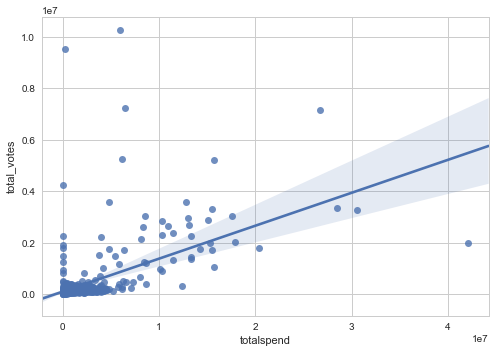

In [348]:
sns.regplot(x='totalspend', y='total_votes', data=DemW)
plt.show()

In [65]:
DemW.plot(x='totalspend', y='total_votes')

In [66]:
sns.lmplot('totalspend','total_votes',DemW)

In [349]:
formula = 'total_votes ~ c1+c2+c3+c4+c5+c6+c7+c8+c9+c12+c13'
model = smf.ols(formula, data=Loser)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_votes   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     166.2
Date:                Thu, 07 Sep 2017   Prob (F-statistic):               0.00
Time:                        16:06:03   Log-Likelihood:                -95948.
No. Observations:                6972   AIC:                         1.919e+05
Df Residuals:                    6960   BIC:                         1.920e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   4.257e+04   2904.764     14.656      0.000      3.69e+04  4.83e+04
c1             0.0491      0.006      8.186      0.000         0.037     0.061
c2             3.2349      0.386      8.390      0.000         2.479     3.991
c3             0.0365      0.024      1.533      0.125        -0.010     0.083
c4             0.0585      0.015      3.843      0.000         0.029     0.088
c5            -0.4301      0.267     -1.610      0.107        -0.954     0.093
c6             0.0291      0.075      0.388      0.698        -0.118     0.176
c7            -1.7877      0.313     -5.718      0.000        -2.401    -1.175
c8             1.3443      1.852      0.726      0.468        -2.286     4.974
c9            -1.9385      3.562     -0.544      0.586        -8.921     5.044
c12           -1.1807      1.670     -0.707      0.480        -4.455     2.093
c13            0.0739      0.002     37.280      0.000         0.070     0.078
==============================================================================
Omnibus:                    12557.513   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         18301418.074
Skew:                          13.071   Prob(JB):                         0.00
Kurtosis:                     252.632   Cond. No.                     1.51e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Simple Regression for Winners and Losers

In [350]:
Total_VoteW = Winner['total_votes']
Total_SpendW = Winner['totalspend']

def reg_m(Total_VoteW,Total_SpendW):
    Total_SpendW=np.array(Total_SpendW).T
    Total_SpendW=sm.add_constant(Total_SpendW)
    model=sm.OLS(endog=Total_VoteW,exog=Total_SpendW)
    results=model.fit()
    return results

print (reg_m(Total_VoteW,Total_SpendW).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     952.8
Date:                Thu, 07 Sep 2017   Prob (F-statistic):          1.11e-178
Time:                        16:06:05   Log-Likelihood:                -37807.
No. Observations:                2619   AIC:                         7.562e+04
Df Residuals:                    2617   BIC:                         7.563e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       9.998e+04   1.03e+04      9.673      0.0

In [351]:
Total_VoteL = Loser['total_votes']
Total_SpendL = Loser['totalspend']

def reg_m(Total_VoteL,Total_SpendL):
    Total_SpendL=np.array(Total_SpendL).T
    Total_SpendL=sm.add_constant(Total_SpendL)
    model=sm.OLS(endog=Total_VoteL,exog=Total_SpendL)
    results=model.fit()
    return results

print (reg_m(Total_VoteL,Total_SpendL).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     1610.
Date:                Thu, 07 Sep 2017   Prob (F-statistic):          6.78e-317
Time:                        16:06:06   Log-Likelihood:                -96037.
No. Observations:                6972   AIC:                         1.921e+05
Df Residuals:                    6970   BIC:                         1.921e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       4.292e+04   2869.619     14.956      0.0

Simple Regression for Democrats and Republicans who won the General Election

In [352]:
Total_VoteDW = DemW['total_votes']
Total_SpendDW = DemW['totalspend']

def reg_m(Total_VoteDW,Total_SpendDW):
    Total_SpendDW=np.array(Total_SpendDW).T
    Total_SpendDW=sm.add_constant(Total_SpendDW)
    model=sm.OLS(endog=Total_VoteDW,exog=Total_SpendDW)
    results=model.fit()
    return results

print (reg_m(Total_VoteDW,Total_SpendDW).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     533.9
Date:                Thu, 07 Sep 2017   Prob (F-statistic):           6.02e-99
Time:                        16:06:07   Log-Likelihood:                -18655.
No. Observations:                1276   AIC:                         3.731e+04
Df Residuals:                    1274   BIC:                         3.732e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       9.515e+04   1.73e+04      5.504      0.0

In [353]:
Total_VoteDWInc = DemWInc['total_votes']
Total_SpendDWInc = DemWInc['totalspend']

def reg_m(Total_VoteDWInc,Total_SpendDWInc):
    Total_SpendDWInc=np.array(Total_SpendDWInc).T
    Total_SpendDWInc=sm.add_constant(Total_SpendDWInc)
    model=sm.OLS(endog=Total_VoteDWInc,exog=Total_SpendDWInc)
    results=model.fit()
    return results

print (reg_m(Total_VoteDWInc,Total_SpendDWInc).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     518.1
Date:                Thu, 07 Sep 2017   Prob (F-statistic):           4.49e-94
Time:                        16:06:07   Log-Likelihood:                -15892.
No. Observations:                1087   AIC:                         3.179e+04
Df Residuals:                    1085   BIC:                         3.180e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       8.023e+04   1.87e+04      4.298      0.0

In [354]:
Total_VoteDWC = DemWC['total_votes']
Total_SpendDWC = DemWC['totalspend']

def reg_m(Total_VoteDWC,Total_SpendDWC):
    Total_SpendDWC=np.array(Total_SpendDWC).T
    Total_SpendDWC=sm.add_constant(Total_SpendDWC)
    model=sm.OLS(endog=Total_VoteDWC,exog=Total_SpendDWC)
    results=model.fit()
    return results

print (reg_m(Total_VoteDWC,Total_SpendDWC).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     102.1
Date:                Thu, 07 Sep 2017   Prob (F-statistic):           1.97e-19
Time:                        16:06:11   Log-Likelihood:                -2729.6
No. Observations:                 189   AIC:                             5463.
Df Residuals:                     187   BIC:                             5470.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       8.494e+04   4.02e+04      2.111      0.0

In [355]:
Gen.to_csv('General.csv', index=False)

In [356]:
Total_VoteRW = RepW['total_votes']
Total_SpendRW = RepW['totalspend']

def reg_m(Total_VoteRW,Total_SpendRW):
    Total_SpendRW=np.array(Total_SpendRW).T
    Total_SpendRW=sm.add_constant(Total_SpendRW)
    model=sm.OLS(endog=Total_VoteRW,exog=Total_SpendRW)
    results=model.fit()
    return results

print (reg_m(Total_VoteRW,Total_SpendRW).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     369.5
Date:                Thu, 07 Sep 2017   Prob (F-statistic):           6.44e-73
Time:                        16:06:12   Log-Likelihood:                -18992.
No. Observations:                1343   AIC:                         3.799e+04
Df Residuals:                    1341   BIC:                         3.800e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.213e+05   1.13e+04     10.729      0.0

In [357]:
Total_VoteRWInc = RepWInc['total_votes']
Total_SpendRWInc = RepWInc['totalspend']

def reg_m(Total_VoteRWInc,Total_SpendRWInc):
    Total_SpendRWInc=np.array(Total_SpendRWInc).T
    Total_SpendRWInc=sm.add_constant(Total_SpendRWInc)
    model=sm.OLS(endog=Total_VoteRWInc,exog=Total_SpendRWInc)
    results=model.fit()
    return results

print (reg_m(Total_VoteRWInc,Total_SpendRWInc).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     98.31
Date:                Thu, 07 Sep 2017   Prob (F-statistic):           2.97e-22
Time:                        16:06:12   Log-Likelihood:                -15478.
No. Observations:                1103   AIC:                         3.096e+04
Df Residuals:                    1101   BIC:                         3.097e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        1.71e+05   1.13e+04     15.093      0.0

In [358]:
Total_VoteRWC = RepWC['total_votes']
Total_SpendRWC = RepWC['totalspend']

def reg_m(Total_VoteRWC,Total_SpendRWC):
    Total_SpendRWC=np.array(Total_SpendRWC).T
    Total_SpendRWC=sm.add_constant(Total_SpendRWC)
    model=sm.OLS(endog=Total_VoteRWC,exog=Total_SpendRWC)
    results=model.fit()
    return results

print (reg_m(Total_VoteRWC,Total_SpendRWC).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     1368.
Date:                Thu, 07 Sep 2017   Prob (F-statistic):          3.06e-257
Time:                        16:06:12   Log-Likelihood:                -54552.
No. Observations:                3939   AIC:                         1.091e+05
Df Residuals:                    3937   BIC:                         1.091e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       3.724e+04   4115.217      9.049      0.0

In [359]:
Total_VoteDL = DemL['total_votes']
Total_SpendDL = DemL['totalspend']

def reg_m(Total_VoteDL,Total_SpendDL):
    Total_SpendDL=np.array(Total_SpendDL).T
    Total_SpendDL=sm.add_constant(Total_SpendDL)
    model=sm.OLS(endog=Total_VoteDL,exog=Total_SpendDL)
    results=model.fit()
    return results

print (reg_m(Total_VoteDL,Total_SpendDL).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     491.4
Date:                Thu, 07 Sep 2017   Prob (F-statistic):          2.69e-101
Time:                        16:06:12   Log-Likelihood:                -43448.
No. Observations:                3151   AIC:                         8.690e+04
Df Residuals:                    3149   BIC:                         8.691e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       4.906e+04   4389.581     11.177      0.0

In [360]:
Total_VoteDLInc = DemLInc['total_votes']
Total_SpendDLInc = DemLInc['totalspend']

def reg_m(Total_VoteDLInc,Total_SpendDLInc):
    Total_SpendDLInc=np.array(Total_SpendDLInc).T
    Total_SpendDLINc=sm.add_constant(Total_SpendDLInc)
    model=sm.OLS(endog=Total_VoteDLInc,exog=Total_SpendDLInc)
    results=model.fit()
    return results

print (reg_m(Total_VoteDLInc,Total_SpendDLInc).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     45.06
Date:                Thu, 07 Sep 2017   Prob (F-statistic):           3.57e-10
Time:                        16:06:12   Log-Likelihood:                -2215.0
No. Observations:                 153   AIC:                             4432.
Df Residuals:                     152   BIC:                             4435.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0750      0.011      6.713      0.0

In [361]:
Total_VoteDLC = DemLC['total_votes']
Total_SpendDLC = DemLC['totalspend']

def reg_m(Total_VoteDLC,Total_SpendDLC):
    Total_SpendDLC=np.array(Total_SpendDLC).T
    Total_SpendDLC=sm.add_constant(Total_SpendDLC)
    model=sm.OLS(endog=Total_VoteDLC,exog=Total_SpendDLC)
    results=model.fit()
    return results

print (reg_m(Total_VoteDLC,Total_SpendDLC).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     441.5
Date:                Thu, 07 Sep 2017   Prob (F-statistic):           1.52e-91
Time:                        16:06:12   Log-Likelihood:                -41079.
No. Observations:                2997   AIC:                         8.216e+04
Df Residuals:                    2995   BIC:                         8.217e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       4.905e+04   4111.434     11.929      0.0

In [362]:
Total_VoteRL = RepL['total_votes']
Total_SpendRL = RepL['totalspend']

def reg_m(Total_VoteRL,Total_SpendRL):
    Total_SpendRL=np.array(Total_SpendRL).T
    Total_SpendRL=sm.add_constant(Total_SpendRL)
    model=sm.OLS(endog=Total_VoteRL,exog=Total_SpendRL)
    results=model.fit()
    return results

print (reg_m(Total_VoteRL,Total_SpendRL).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     1145.
Date:                Thu, 07 Sep 2017   Prob (F-statistic):          1.03e-219
Time:                        16:06:13   Log-Likelihood:                -52580.
No. Observations:                3821   AIC:                         1.052e+05
Df Residuals:                    3819   BIC:                         1.052e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       3.669e+04   3806.083      9.640      0.0

In [363]:
Total_VoteRLInc = RepLInc['total_votes']
Total_SpendRLInc = RepLInc['totalspend']

def reg_m(Total_VoteRLInc,Total_SpendRLInc):
    Total_SpendRLInc=np.array(Total_SpendRLInc).T
    Total_SpendRLInc=sm.add_constant(Total_SpendRLInc)
    model=sm.OLS(endog=Total_VoteRLInc,exog=Total_SpendRLInc)
    results=model.fit()
    return results

print (reg_m(Total_VoteRLInc,Total_SpendRLInc).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     229.7
Date:                Thu, 07 Sep 2017   Prob (F-statistic):           1.48e-29
Time:                        16:06:13   Log-Likelihood:                -1670.8
No. Observations:                 121   AIC:                             3346.
Df Residuals:                     119   BIC:                             3351.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1146.6715   2.68e+04      0.043      0.9

In [364]:
Total_VoteRLC = RepLC['total_votes']
Total_SpendRLC = RepLC['totalspend']

def reg_m(Total_VoteRLC,Total_SpendRLC):
    Total_SpendRLC=np.array(Total_SpendRLC).T
    Total_SpendRLC=sm.add_constant(Total_SpendRLC)
    model=sm.OLS(endog=Total_VoteRLC,exog=Total_SpendRLC)
    results=model.fit()
    return results

print (reg_m(Total_VoteRLC,Total_SpendRLC).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     828.9
Date:                Thu, 07 Sep 2017   Prob (F-statistic):          1.22e-164
Time:                        16:06:13   Log-Likelihood:                -50894.
No. Observations:                3699   AIC:                         1.018e+05
Df Residuals:                    3697   BIC:                         1.018e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       3.754e+04   3843.520      9.766      0.0

Multi-linear regressions

In [365]:
Total_VoteW = Winner['total_votes']
Total_SpendW = [Winner['c1'],Winner['c2'],Winner['c3'],Winner['c4'],Winner['c5'],Winner['c6'],Winner['c7'],Winner['c8'],Winner['c9'],Winner['c10'],Winner['c11'],Winner['c12'],Winner['c13']]

def reg_m(Total_VoteW,Total_SpendW):
    Total_SpendW=np.array(Total_SpendW).T
    Total_SpendW=sm.add_constant(Total_SpendW)
    model=sm.OLS(endog=Total_VoteW,exog=Total_SpendW)
    results=model.fit()
    return results

print (reg_m(Total_VoteW,Total_SpendW).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     79.23
Date:                Thu, 07 Sep 2017   Prob (F-statistic):          1.57e-177
Time:                        16:06:13   Log-Likelihood:                -37778.
No. Observations:                2619   AIC:                         7.558e+04
Df Residuals:                    2605   BIC:                         7.567e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.079e+05    1.1e+04      9.834      0.0

In [366]:
Total_VoteL = Loser['total_votes']
Total_SpendL = [Loser['c1'],Loser['c2'],Loser['c3'],Loser['c4'],Loser['c5'],Loser['c6'],Loser['c7'],Loser['c8'],Loser['c9'],Loser['c10'],Loser['c11'],Loser['c12'],Loser['c13']]

def reg_m(Total_VoteL,Total_SpendL):
    Total_SpendL=np.array(Total_SpendL).T
    Total_SpendL=sm.add_constant(Total_SpendL)
    model=sm.OLS(endog=Total_VoteL,exog=Total_SpendWL)
    results=model.fit()
    return results

print (reg_m(Total_VoteL,Total_SpendL).summary())

NameError: name 'Total_SpendWL' is not defined

In [367]:
Total_VoteD = Dem['total_votes']
Total_SpendD = [Dem['c1'],Dem['c2'],Dem['c3'],Dem['c4'],Dem['c5'],Dem['c6'],Dem['c7'],Dem['c8'],Dem['c9'],Dem['c10'],Dem['c11'],Dem['c12'],Dem['c13']]

def reg_m(Total_VoteD,Total_SpendD):
    Total_SpendD=np.array(Total_SpendD).T
    Total_SpendD=sm.add_constant(Total_SpendD)
    model=sm.OLS(endog=Total_VoteD,exog=Total_SpendD)
    results=model.fit()
    return results

print (reg_m(Total_VoteD,Total_SpendD).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     135.6
Date:                Thu, 07 Sep 2017   Prob (F-statistic):          9.55e-310
Time:                        16:06:13   Log-Likelihood:                -62833.
No. Observations:                4427   AIC:                         1.257e+05
Df Residuals:                    4413   BIC:                         1.258e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       5.546e+04   5851.043      9.479      0.0

In [368]:
Total_VoteR = Rep['total_votes']
Total_SpendR = [Rep['c1'],Rep['c2'],Rep['c3'],Rep['c4'],Rep['c5'],Rep['c6'],Rep['c7'],Rep['c8'],Rep['c9'],Rep['c10'],Rep['c11'],Rep['c12'],Rep['c13']]

def reg_m(Total_VoteR,Total_SpendR):
    Total_SpendR=np.array(Total_SpendR).T
    Total_SpendR=sm.add_constant(Total_SpendR)
    model=sm.OLS(endog=Total_VoteR,exog=Total_SpendR)
    results=model.fit()
    return results

print (reg_m(Total_VoteR,Total_SpendR).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     151.2
Date:                Thu, 07 Sep 2017   Prob (F-statistic):               0.00
Time:                        16:06:14   Log-Likelihood:                -71736.
No. Observations:                5164   AIC:                         1.435e+05
Df Residuals:                    5150   BIC:                         1.436e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       5.914e+04   3998.314     14.791      0.0

In [369]:
Total_VoteDW = DemW['total_votes']
Total_SpendDW = [DemW['c1'],DemW['c2'],DemW['c3'],DemW['c4'],DemW['c5'],DemW['c6'],DemW['c7'],DemW['c8'],DemW['c9'],DemW['c10'],DemW['c11'],DemW['c12'],DemW['c13']]

def reg_m(Total_VoteDW,Total_SpendDW):
    Total_SpendDW=np.array(Total_SpendDW).T
    Total_SpendDW=sm.add_constant(Total_SpendDW)
    model=sm.OLS(endog=Total_VoteDW,exog=Total_SpendDW)
    results=model.fit()
    return results

print (reg_m(Total_VoteDW,Total_SpendDW).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     44.60
Date:                Thu, 07 Sep 2017   Prob (F-statistic):           3.92e-94
Time:                        16:06:14   Log-Likelihood:                -18637.
No. Observations:                1276   AIC:                         3.730e+04
Df Residuals:                    1262   BIC:                         3.737e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       8.636e+04   1.85e+04      4.663      0.0

In [370]:
Total_VoteRW = RepW['total_votes']
Total_SpendRW = [RepW['c1'],RepW['c2'],RepW['c3'],RepW['c4'],RepW['c5'],RepW['c6'],RepW['c7'],RepW['c8'],RepW['c9'],RepW['c10'],RepW['c11'],RepW['c12'],RepW['c13']]

def reg_m(Total_VoteRW,Total_SpendRW):
    Total_SpendRW=np.array(Total_SpendRW).T
    Total_SpendRW=sm.add_constant(Total_SpendRW)
    model=sm.OLS(endog=Total_VoteRW,exog=Total_SpendRW)
    results=model.fit()
    return results

print (reg_m(Total_VoteRW,Total_SpendRW).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     33.75
Date:                Thu, 07 Sep 2017   Prob (F-statistic):           2.71e-73
Time:                        16:06:14   Log-Likelihood:                -18964.
No. Observations:                1343   AIC:                         3.796e+04
Df Residuals:                    1329   BIC:                         3.803e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.379e+05    1.2e+04     11.479      0.0

In [371]:
#Democrat incumbents who won in the general election
Total_VoteDWInc = DemWInc['total_votes']
Total_SpendDWInc = [DemWInc['c1'],DemWInc['c2'],DemWInc['c3'],DemWInc['c4'],DemWInc['c5'],DemWInc['c6'],DemWInc['c7'],DemWInc['c8'],DemWInc['c9'],DemWInc['c10'],DemWInc['c11'],DemWInc['c12'],DemWInc['c13']]

def reg_m(Total_VoteDWInc,Total_SpendDWInc):
    Total_SpendDWInc=np.array(Total_SpendDWInc).T
    Total_SpendDWInc=sm.add_constant(Total_SpendDWInc)
    model=sm.OLS(endog=Total_VoteDWInc,exog=Total_SpendDWInc)
    results=model.fit()
    return results

print (reg_m(Total_VoteDWInc,Total_SpendDWInc).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     56.28
Date:                Thu, 07 Sep 2017   Prob (F-statistic):          1.88e-111
Time:                        16:06:14   Log-Likelihood:                -15821.
No. Observations:                1087   AIC:                         3.167e+04
Df Residuals:                    1073   BIC:                         3.174e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       5.641e+04    1.9e+04      2.975      0.0

In [372]:
#Republican Incumbents who won in the general election
Total_VoteRWInc = RepWInc['total_votes']
Total_SpendRWInc = [RepWInc['c1'],RepWInc['c2'],RepWInc['c3'],RepWInc['c4'],RepWInc['c5'],RepWInc['c6'],RepWInc['c7'],RepWInc['c8'],RepWInc['c9'],RepWInc['c10'],RepWInc['c11'],RepWInc['c12'],RepWInc['c13']]

def reg_m(Total_VoteRWInc,Total_SpendRWInc):
    Total_SpendRWInc=np.array(Total_SpendRWInc).T
    Total_SpendRWInc=sm.add_constant(Total_SpendRWInc)
    model=sm.OLS(endog=Total_VoteRWInc,exog=Total_SpendRWInc)
    results=model.fit()
    return results

print (reg_m(Total_VoteRWInc,Total_SpendRWInc).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     11.25
Date:                Thu, 07 Sep 2017   Prob (F-statistic):           5.47e-23
Time:                        16:06:14   Log-Likelihood:                -15456.
No. Observations:                1103   AIC:                         3.094e+04
Df Residuals:                    1089   BIC:                         3.101e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.818e+05    1.2e+04     15.091      0.0

In [373]:
#Democrat challengers who won in the general election
Total_VoteDWC = DemWC['total_votes']
Total_SpendDWC = [DemWC['c1'],DemWC['c2'],DemWC['c3'],DemWC['c4'],DemWC['c5'],DemWC['c6'],DemWC['c7'],DemWC['c8'],DemWC['c9'],DemWC['c10'],DemWC['c11'],DemWC['c12'],DemWC['c13']]

def reg_m(Total_VoteDWC,Total_SpendDWC):
    Total_SpendDWC=np.array(Total_SpendDWC).T
    Total_SpendDWC=sm.add_constant(Total_SpendDWC)
    model=sm.OLS(endog=Total_VoteDWC,exog=Total_SpendDWC)
    results=model.fit()
    return results

print (reg_m(Total_VoteDWC,Total_SpendDWC).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     10.80
Date:                Thu, 07 Sep 2017   Prob (F-statistic):           1.06e-16
Time:                        16:06:14   Log-Likelihood:                -2715.1
No. Observations:                 189   AIC:                             5458.
Df Residuals:                     175   BIC:                             5504.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       4281.0186   4.64e+04      0.092      0.9

In [374]:
#Republican challengers who won in the general election
Total_VoteRWC = RepWC['total_votes']
Total_SpendRWC = [RepWC['c1'],RepWC['c2'],RepWC['c3'],RepWC['c4'],RepWC['c5'],RepWC['c6'],RepWC['c7'],RepWC['c8'],RepWC['c9'],RepWC['c10'],RepWC['c11'],RepWC['c12'],RepWC['c13']]

def reg_m(Total_VoteRWC,Total_SpendRWC):
    Total_SpendRWC=np.array(Total_SpendRWC).T
    Total_SpendRWC=sm.add_constant(Total_SpendRWC)
    model=sm.OLS(endog=Total_VoteRWC,exog=Total_SpendRWC)
    results=model.fit()
    return results

print (reg_m(Total_VoteRWC,Total_SpendRWC).summary())

                            OLS Regression Results                            
Dep. Variable:            total_votes   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     126.7
Date:                Thu, 07 Sep 2017   Prob (F-statistic):          1.14e-286
Time:                        16:06:15   Log-Likelihood:                -54449.
No. Observations:                3939   AIC:                         1.089e+05
Df Residuals:                    3925   BIC:                         1.090e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       3.757e+04   4145.353      9.063      0.0

Confidence Interval for General Votes

In [376]:
Total_Vote = Gen['total_votes']

def mean_confidence_interval(Total_Vote, confidence=0.95):
    a = 1.0*np.array(Total_Vote)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(Total_Vote, confidence=0.95))

(124771.2744239391, 117516.99108776805, 132025.55776011015)


In [377]:
costvote = Gen['costvote']

def mean_confidence_interval(costvote, confidence=0.95):
    a = 1.0*np.array(costvote)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(costvote, confidence=0.95))

(10.055714708654493, 9.251550325311813, 10.859879091997174)


Confidence Interval for General Election Winners and Losers

In [378]:
Total_VoteW = Winner['total_votes']

def mean_confidence_interval(Total_VoteW, confidence=0.95):
    a = 1.0*np.array(Total_VoteW)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(Total_VoteW, confidence=0.95))

(267579.47460862924, 247441.14238260701, 287717.80683465145)


In [379]:
costvoteW = Winner['costvote']

def mean_confidence_interval(costvoteW, confidence=0.95):
    a = 1.0*np.array(costvoteW)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(costvoteW, confidence=0.95))

(7.1358031971903868, 6.8526356358384373, 7.4189707585423363)


In [380]:
Total_VoteL = Loser['total_votes']

def mean_confidence_interval(Total_VoteL, confidence=0.95):
    a = 1.0*np.array(Total_VoteL)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(Total_VoteL, confidence=0.95))

(71126.025387263333, 65075.402464290244, 77176.648310236429)


In [381]:
costvoteL = Loser['costvote']

def mean_confidence_interval(costvoteL, confidence=0.95):
    a = 1.0*np.array(costvoteL)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(costvoteL, confidence=0.95))

(11.152566149923068, 10.052471617414804, 12.252660682431332)


Confidence Interval for Democrats and Republicans in General Election

In [382]:
Total_VoteD = Dem['total_votes']

def mean_confidence_interval(Total_VoteD, confidence=0.95):
    a = 1.0*np.array(Total_VoteD)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(Total_VoteD, confidence=0.95))

(138004.81477298395, 125699.34418170642, 150310.28536426148)


In [383]:
costvoteD = Dem['costvote']

def mean_confidence_interval(costvoteD, confidence=0.95):
    a = 1.0*np.array(costvoteD)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(costvoteD, confidence=0.95))

(9.9059228319288977, 8.4011797589997705, 11.410665904858025)


In [384]:
Total_VoteR = Rep['total_votes']

def mean_confidence_interval(Total_VoteR, confidence=0.95):
    a = 1.0*np.array(Total_VoteR)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(Total_VoteR, confidence=0.95))

(113426.40937257939, 105053.72108084988, 121799.09766430891)


In [385]:
costvoteR = Rep['costvote']

def mean_confidence_interval(costvoteR, confidence=0.95):
    a = 1.0*np.array(costvoteR)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(costvoteR, confidence=0.95))

(10.184128465096055, 9.4308090034965151, 10.937447926695596)


Confidence Intervals for Democrats and Republicans who who in General Election 

In [386]:
Total_VoteDW = DemW['total_votes']

def mean_confidence_interval(Total_VoteDW, confidence=0.95):
    a = 1.0*np.array(Total_VoteDW)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(Total_VoteDW, confidence=0.95))

(287388.9937304075, 251986.32207602129, 322791.66538479371)


In [387]:
costvoteDW = DemW['costvote']

def mean_confidence_interval(costvoteDW, confidence=0.95):
    a = 1.0*np.array(costvoteDW)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(costvoteDW, confidence=0.95))

(7.0365715116255894, 6.6451929166236194, 7.4279501066275593)


In [388]:
Total_VoteRW = RepW['total_votes']

def mean_confidence_interval(Total_VoteRW, confidence=0.95):
    a = 1.0*np.array(Total_VoteRW)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(Total_VoteRW, confidence=0.95))

(248758.2189128816, 228488.52280550619, 269027.915020257)


In [389]:
costvoteRW = RepW['costvote']

def mean_confidence_interval(costvoteRW, confidence=0.95):
    a = 1.0*np.array(costvoteRW)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(costvoteRW, confidence=0.95))

(7.2300843816882878, 6.8214224838662849, 7.6387462795102907)


Confidence Interval of Democrats and Republican Incumbents who won the General Election

In [390]:
Total_VoteDWInc = DemWInc['total_votes']

def mean_confidence_interval(Total_VoteDWInc, confidence=0.95):
    a = 1.0*np.array(Total_VoteDWInc)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(Total_VoteDWInc, confidence=0.95))

(282452.65133394662, 243313.06239678344, 321592.2402711098)


In [391]:
costvoteDWInc = DemWInc['costvote']

def mean_confidence_interval(costvoteDWInc, confidence=0.95):
    a = 1.0*np.array(costvoteDWInc)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(costvoteDWInc, confidence=0.95))

(6.1843323532535575, 5.7913129154520639, 6.577351791055051)


In [392]:
Total_VoteRWInc = RepWInc['total_votes']

def mean_confidence_interval(Total_VoteRWInc, confidence=0.95):
    a = 1.0*np.array(Total_VoteRWInc)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(Total_VoteRWInc, confidence=0.95))

(238447.13689936537, 219892.54058590686, 257001.73321282389)


In [393]:
costvoteRWInc = RepWInc['costvote']

def mean_confidence_interval(costvoteRWInc, confidence=0.95):
    a = 1.0*np.array(costvoteRWInc)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(costvoteRWInc, confidence=0.95))

(6.5653184596774574, 6.1400696862070854, 6.9905672331478295)


Confidence Intervals for Democrats and Republicans challengers who won the General Election

In [394]:
Total_VoteDWC = DemWC['total_votes']

def mean_confidence_interval(Total_VoteDWC, confidence=0.95):
    a = 1.0*np.array(Total_VoteDWC)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(Total_VoteDWC, confidence=0.95))

(315779.49206349207, 234775.42815370113, 396783.55597328302)


In [395]:
costvoteDWC = DemWC['costvote']

def mean_confidence_interval(costvoteDWC, confidence=0.95):
    a = 1.0*np.array(costvoteDWC)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(costvoteDWC, confidence=0.95))

(11.938073972738813, 10.788925465044141, 13.087222480433486)


In [396]:
Total_VoteRWC = RepWC['total_votes']

def mean_confidence_interval(Total_VoteRWC, confidence=0.95):
    a = 1.0*np.array(Total_VoteRWC)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(Total_VoteRWC, confidence=0.95))

(74782.545569941605, 65707.823465183465, 83857.267674699746)


In [397]:
costvoteRWC = RepWC['costvote']

def mean_confidence_interval(costvoteRWC, confidence=0.95):
    a = 1.0*np.array(costvoteRWC)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

print (mean_confidence_interval(costvoteRWC, confidence=0.95))

(10.777087222197162, 9.8184860939333678, 11.735688350460956)


In [398]:
print('Total number of rows', Winner .shape[0])
print ('Total number of columns is now', Winner.shape[1] )

Total number of rows 2619
Total number of columns is now 27


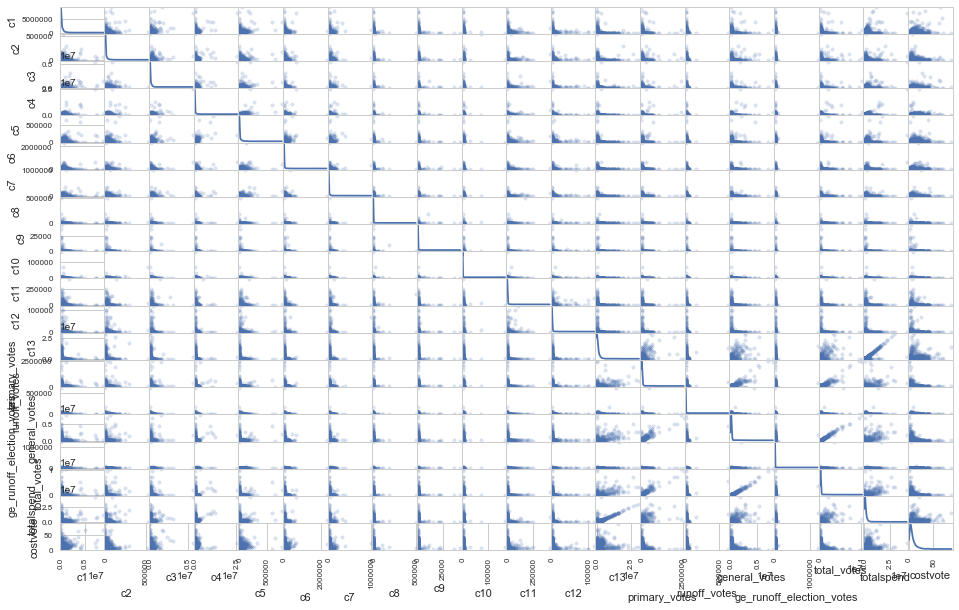

In [404]:
scatter_matrix(Winner, alpha=0.2, figsize=(16, 10), diagonal='kde')
plt.show()

In [405]:
#Pearson correlation
Winner[['c1', 'c2', 'c3','c4','c5','c6','c7','c8','c9','c10','c11','c12','c13','total_votes','totalspend','costvote']].corr()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,total_votes,totalspend,costvote
c1,1.000000,0.277113,0.505236,0.428517,0.396496,0.191091,0.217119,-0.000024,-0.006251,0.016656,0.093435,0.042795,-0.125865,0.055967,0.285768,0.281452
c2,0.277113,1.000000,0.344031,0.312742,0.321291,0.152564,0.231753,0.025549,0.009919,0.191860,0.128867,0.098361,-0.039977,0.117557,0.169759,0.055472
c3,0.505236,0.344031,1.000000,0.636876,0.409092,0.206309,0.216024,0.010872,0.025240,0.004361,0.166581,0.052192,-0.081747,0.121414,0.330900,0.189966
c4,0.428517,0.312742,0.636876,1.000000,0.616542,0.273928,0.165548,0.005450,-0.005270,0.017856,0.102235,0.011614,-0.054690,0.178344,0.426978,0.150890
c5,0.396496,0.321291,0.409092,0.616542,1.000000,0.324039,0.304731,0.006316,-0.003656,0.014988,0.122236,0.061072,-0.107109,0.092010,0.242650,0.187987
c6,0.191091,0.152564,0.206309,0.273928,0.324039,1.000000,0.173292,-0.000398,0.022833,0.004813,0.034230,0.048589,-0.075852,-0.007572,0.108671,0.122539
c7,0.217119,0.231753,0.216024,0.165548,0.304731,0.173292,1.000000,0.015356,-0.001044,0.012406,0.108097,0.195714,-0.092874,-0.011194,0.054787,0.085649
c8,-0.000024,0.025549,0.010872,0.005450,0.006316,-0.000398,0.015356,1.000000,0.038835,0.015967,0.185088,0.006090,-0.014489,-0.008049,-0.008658,-0.007641
c9,-0.006251,0.009919,0.025240,-0.005270,-0.003656,0.022833,-0.001044,0.038835,1.000000,0.004309,-0.006268,0.000804,-0.024784,-0.012353,-0.022121,-0.025507
c10,0.016656,0.191860,0.004361,0.017856,0.014988,0.004813,0.012406,0.015967,0.004309,1.000000,0.018917,0.019644,-0.009355,-0.000229,0.004907,0.002647


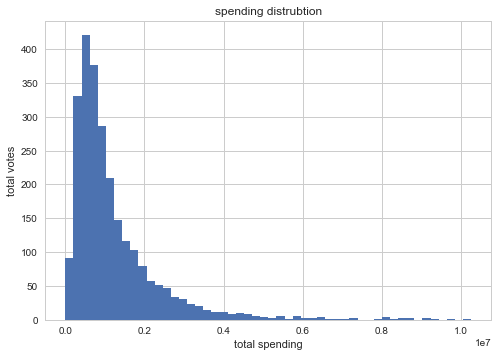

In [406]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(Winner['totalspend'], bins = 50, range = (Winner['total_votes'].min(),Winner['total_votes'].max()))
plt.title('spending distrubtion')
plt.xlabel('total spending')
plt.ylabel('total votes')
plt.show()

# machine learning test

In [407]:

feature_cols = ['c1', 'c2','c3', 'c4','c5','c6','c7','c8','c9','c10','c11','c12','c13']

# use a list to select a subset of the original DataFrame
X = RepW[feature_cols]

# print the first five rows
X.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13
5,11727.82,0.00,16964.09,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,666262.07
6,12132.25,0.00,16866.78,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,541474.45
14,54616.04,2343.79,71452.12,547321.04,27000.0,66857.04,9362.66,249.0,0.0,0.0,0.0,0.0,1626.96
15,54178.00,8154.95,121673.90,165131.27,17000.0,16138.18,9083.92,0.0,0.0,0.0,0.0,0.0,2321.95
16,15420.65,8540.32,91996.02,81481.66,15000.0,11833.66,2350.00,0.0,0.0,0.0,0.0,0.0,215.00


In [408]:
print (type(X))
print (X.shape)

<class 'pandas.core.frame.DataFrame'>
(1343, 13)


In [410]:
# now we select a serie Y from the data frame (Y is the target feature)
y = RepW['total_votes']

## we could have done also Y= data_Frame.car_price

# print the first 5 rows
y.head(5)

5     180591.0
6     113103.0
14    166855.0
15    254348.0
16    164455.0
Name: total_votes, dtype: float64

In [411]:
print (type(y))
print (y.shape)

<class 'pandas.core.series.Series'>
(1343,)


In [412]:
from sklearn.cross_validation import train_test_split
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

In [413]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print(y_test.shape)

(1007, 13)
(336, 13)
(1007,)
(336,)


In [414]:
# we import the model first

from sklearn.linear_model import LinearRegression

# im=ntantiate the model
linreg = LinearRegression()

# fit the model to the training data(Learn the coefficient)
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [415]:
#Linear Regression
print('the Y intercept is :', linreg.intercept_)
print ('the coefficients  are :', linreg.coef_)

the Y intercept is : 137889.935606
the coefficients  are : [ 0.01620357  1.23392916 -0.01671614  0.07371245 -0.20241407 -0.10207081
 -0.2581942  -0.25913398  2.13341747 -1.62912919  0.59927623 -0.15037365
  0.09913974]


In [416]:
for idx, feature_cols in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(feature_cols, linreg.coef_[idx]))

The coefficient for c1 is 0.01620357065718976
The coefficient for c2 is 1.2339291583658467
The coefficient for c3 is -0.016716139736633065
The coefficient for c4 is 0.07371245003237589
The coefficient for c5 is -0.20241406835851194
The coefficient for c6 is -0.10207080955205516
The coefficient for c7 is -0.25819419781565167
The coefficient for c8 is -0.2591339792679506
The coefficient for c9 is 2.13341746745909
The coefficient for c10 is -1.6291291906186627
The coefficient for c11 is 0.5992762318754177
The coefficient for c12 is -0.15037365187626817
The coefficient for c13 is 0.09913973869140202


In [417]:
for idx, feature_cols in enumerate(X_train.columns):
    print('the Y intercept is :', linreg.intercept_)

the Y intercept is : 137889.935606
the Y intercept is : 137889.935606
the Y intercept is : 137889.935606
the Y intercept is : 137889.935606
the Y intercept is : 137889.935606
the Y intercept is : 137889.935606
the Y intercept is : 137889.935606
the Y intercept is : 137889.935606
the Y intercept is : 137889.935606
the Y intercept is : 137889.935606
the Y intercept is : 137889.935606
the Y intercept is : 137889.935606
the Y intercept is : 137889.935606


In [418]:
RepW['party'].unique()

array(['R'], dtype=object)

In [419]:
expected  = X
predicted = y


# Evaluate fit of the model
linreg.score(X, y)

0.24818857752375389

In [420]:
from sklearn.linear_model import Perceptron
perc = Perceptron()
perc.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [421]:
from sklearn.neighbors import KNeighborsRegressor

KNR = KNeighborsRegressor()
KNR.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [423]:
print(y_test.shape)

(336,)


In [425]:
linreg.score(X, y)

0.24818857752375389

In [426]:
X1 = Winner['totalspend']
print (type(X1))
print (X1.shape)

<class 'pandas.core.series.Series'>
(2619,)


In [427]:
Y1 = Winner['total_votes']

## we could have done also Y= data_Frame.car_price

# print the first 5 rows
Y1.head(5)

5     180591.0
6     113103.0
14    166855.0
15    254348.0
16    164455.0
Name: total_votes, dtype: float64

In [428]:
print (type(Y))
print (Y.shape)

NameError: name 'Y' is not defined

In [429]:
from sklearn.cross_validation import train_test_split
X1_train, Y1_train, X1_test, Y1_test = train_test_split(X1, Y1,random_state = 1)

In [430]:
from sklearn.metrics import mean_squared_error as mse
expected  = y
predicted = model.predict(X)
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

ValueError: shapes (6972,12) and (1343,13) not aligned: 12 (dim 1) != 1343 (dim 0)

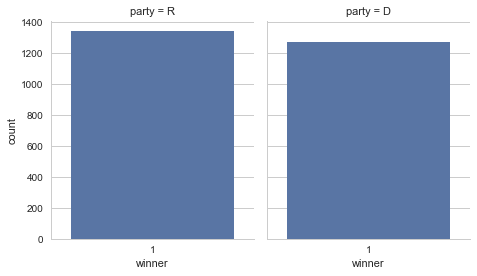

In [431]:
sns.factorplot("winner", col="party", col_wrap=3, 
                   data=Winner[Winner.party.notnull()], kind="count", size=4, aspect=.8)
plt.show()

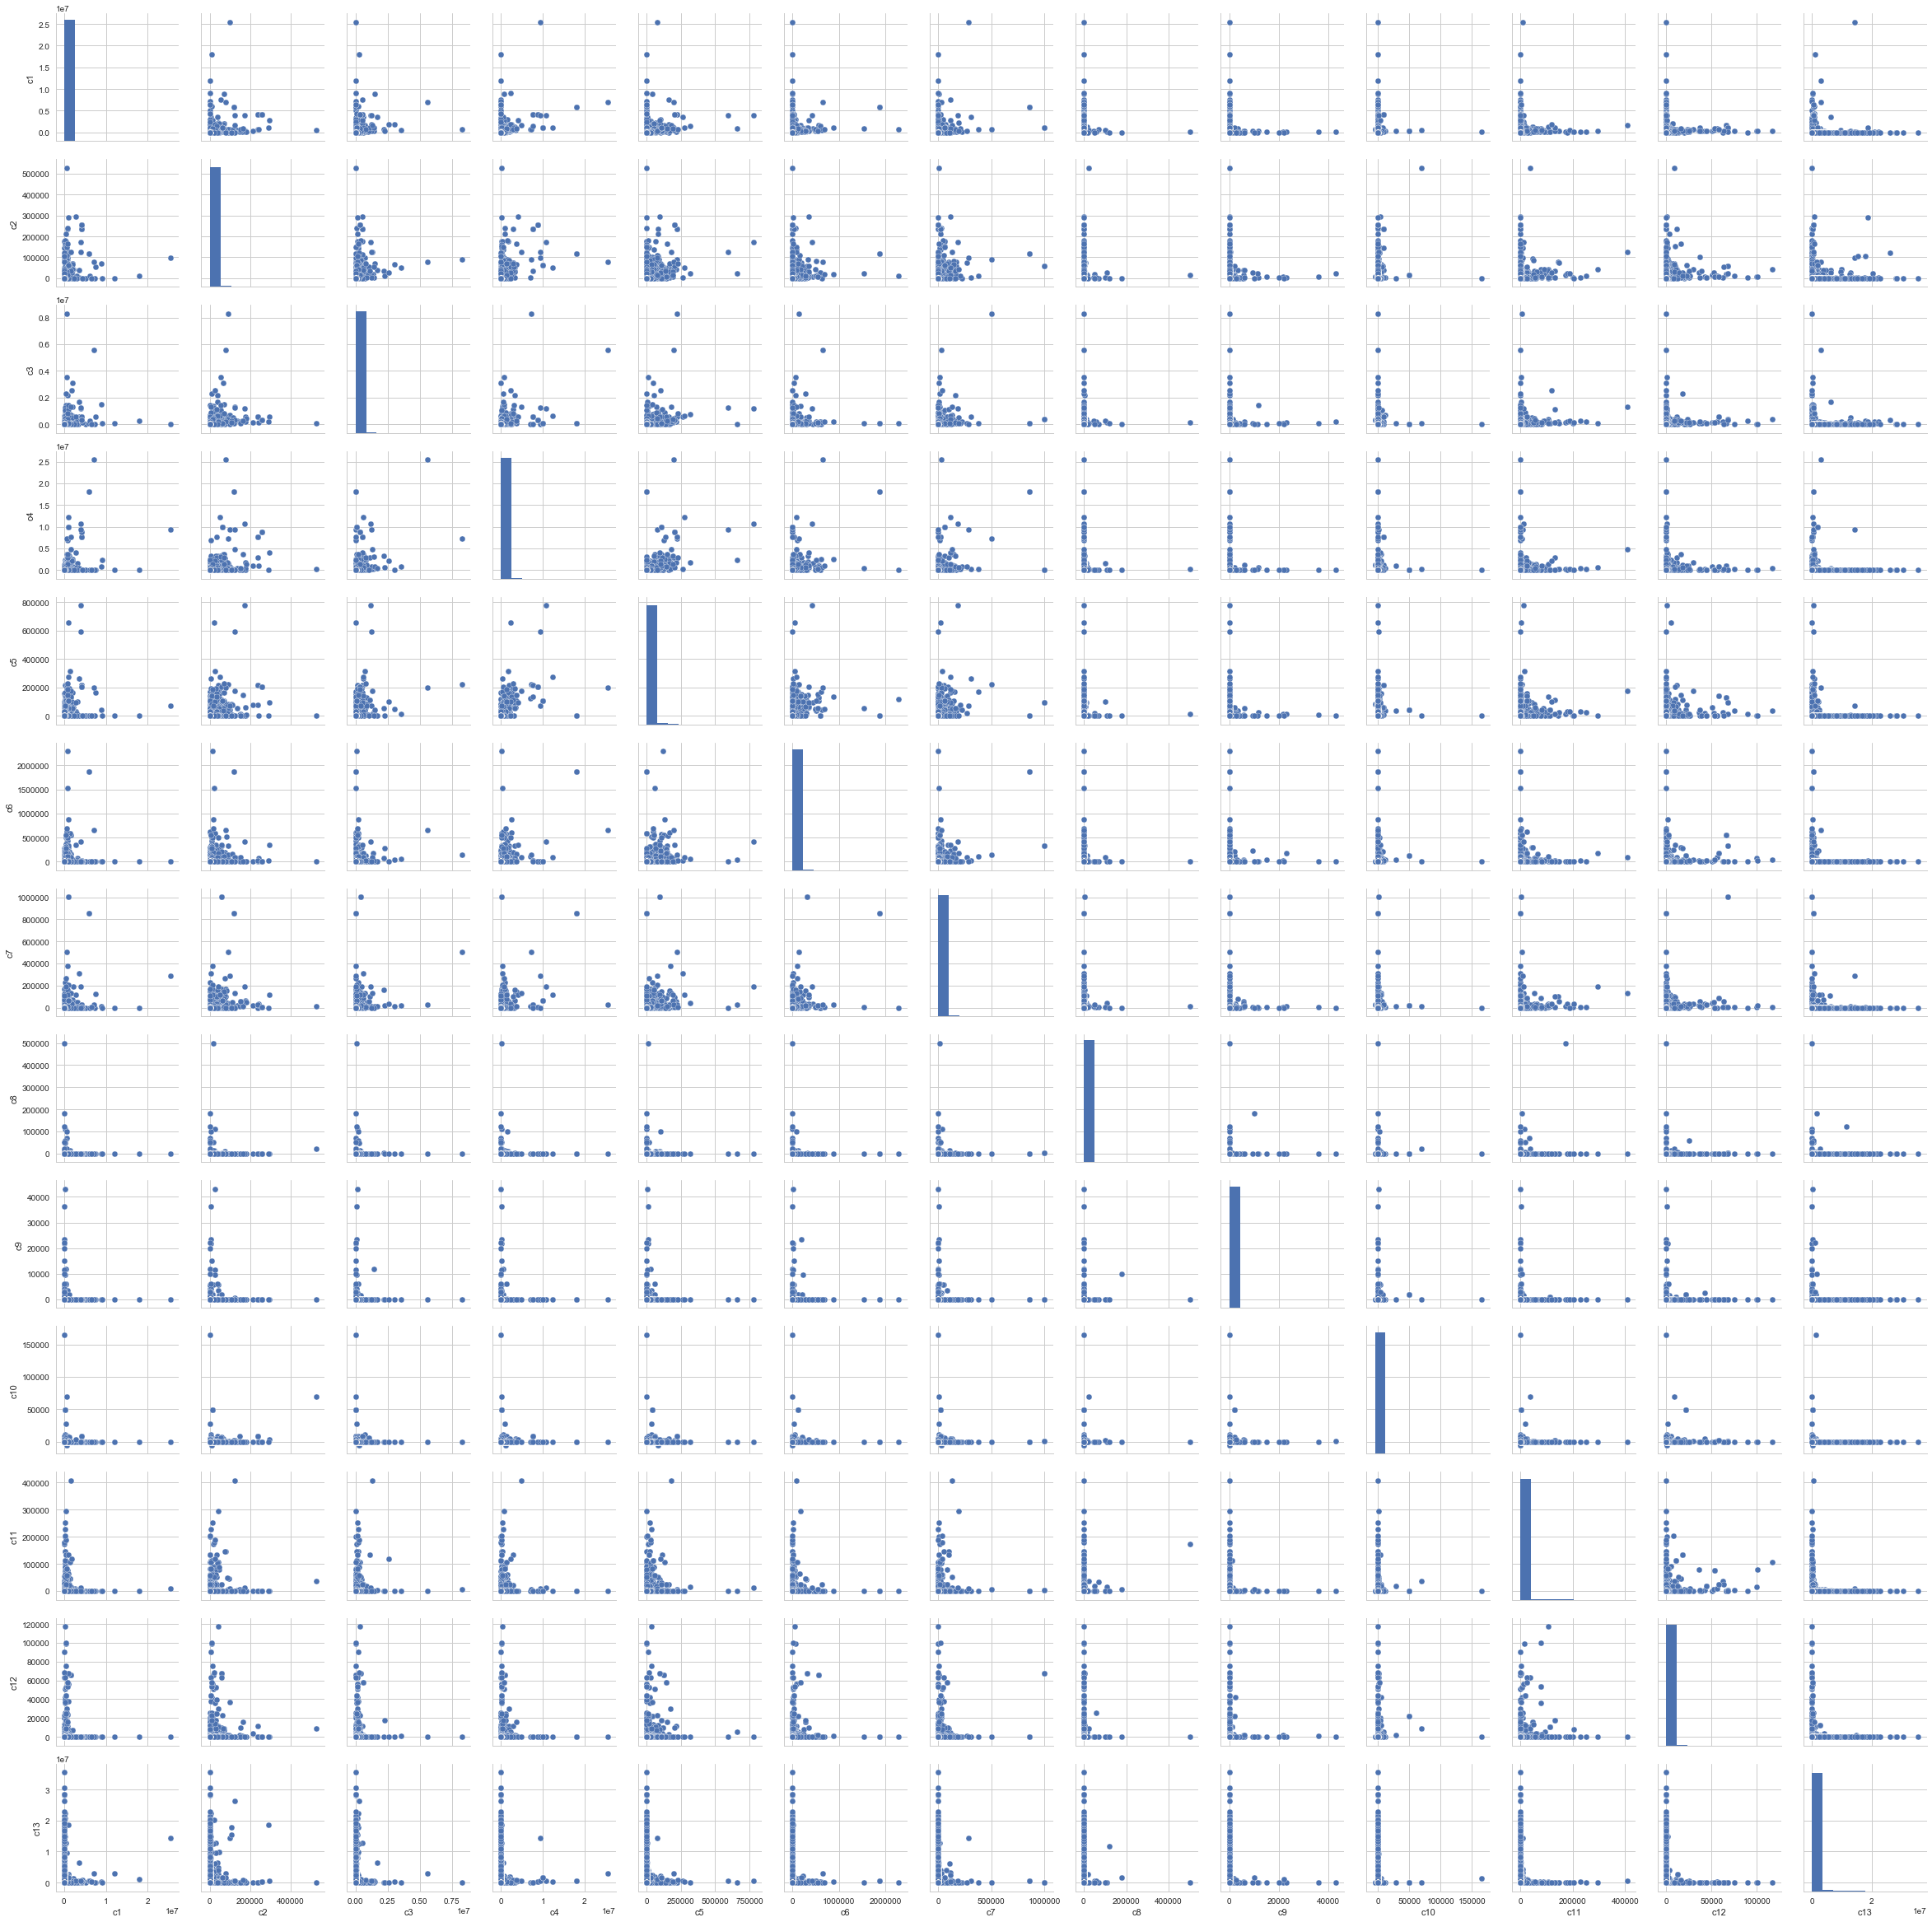

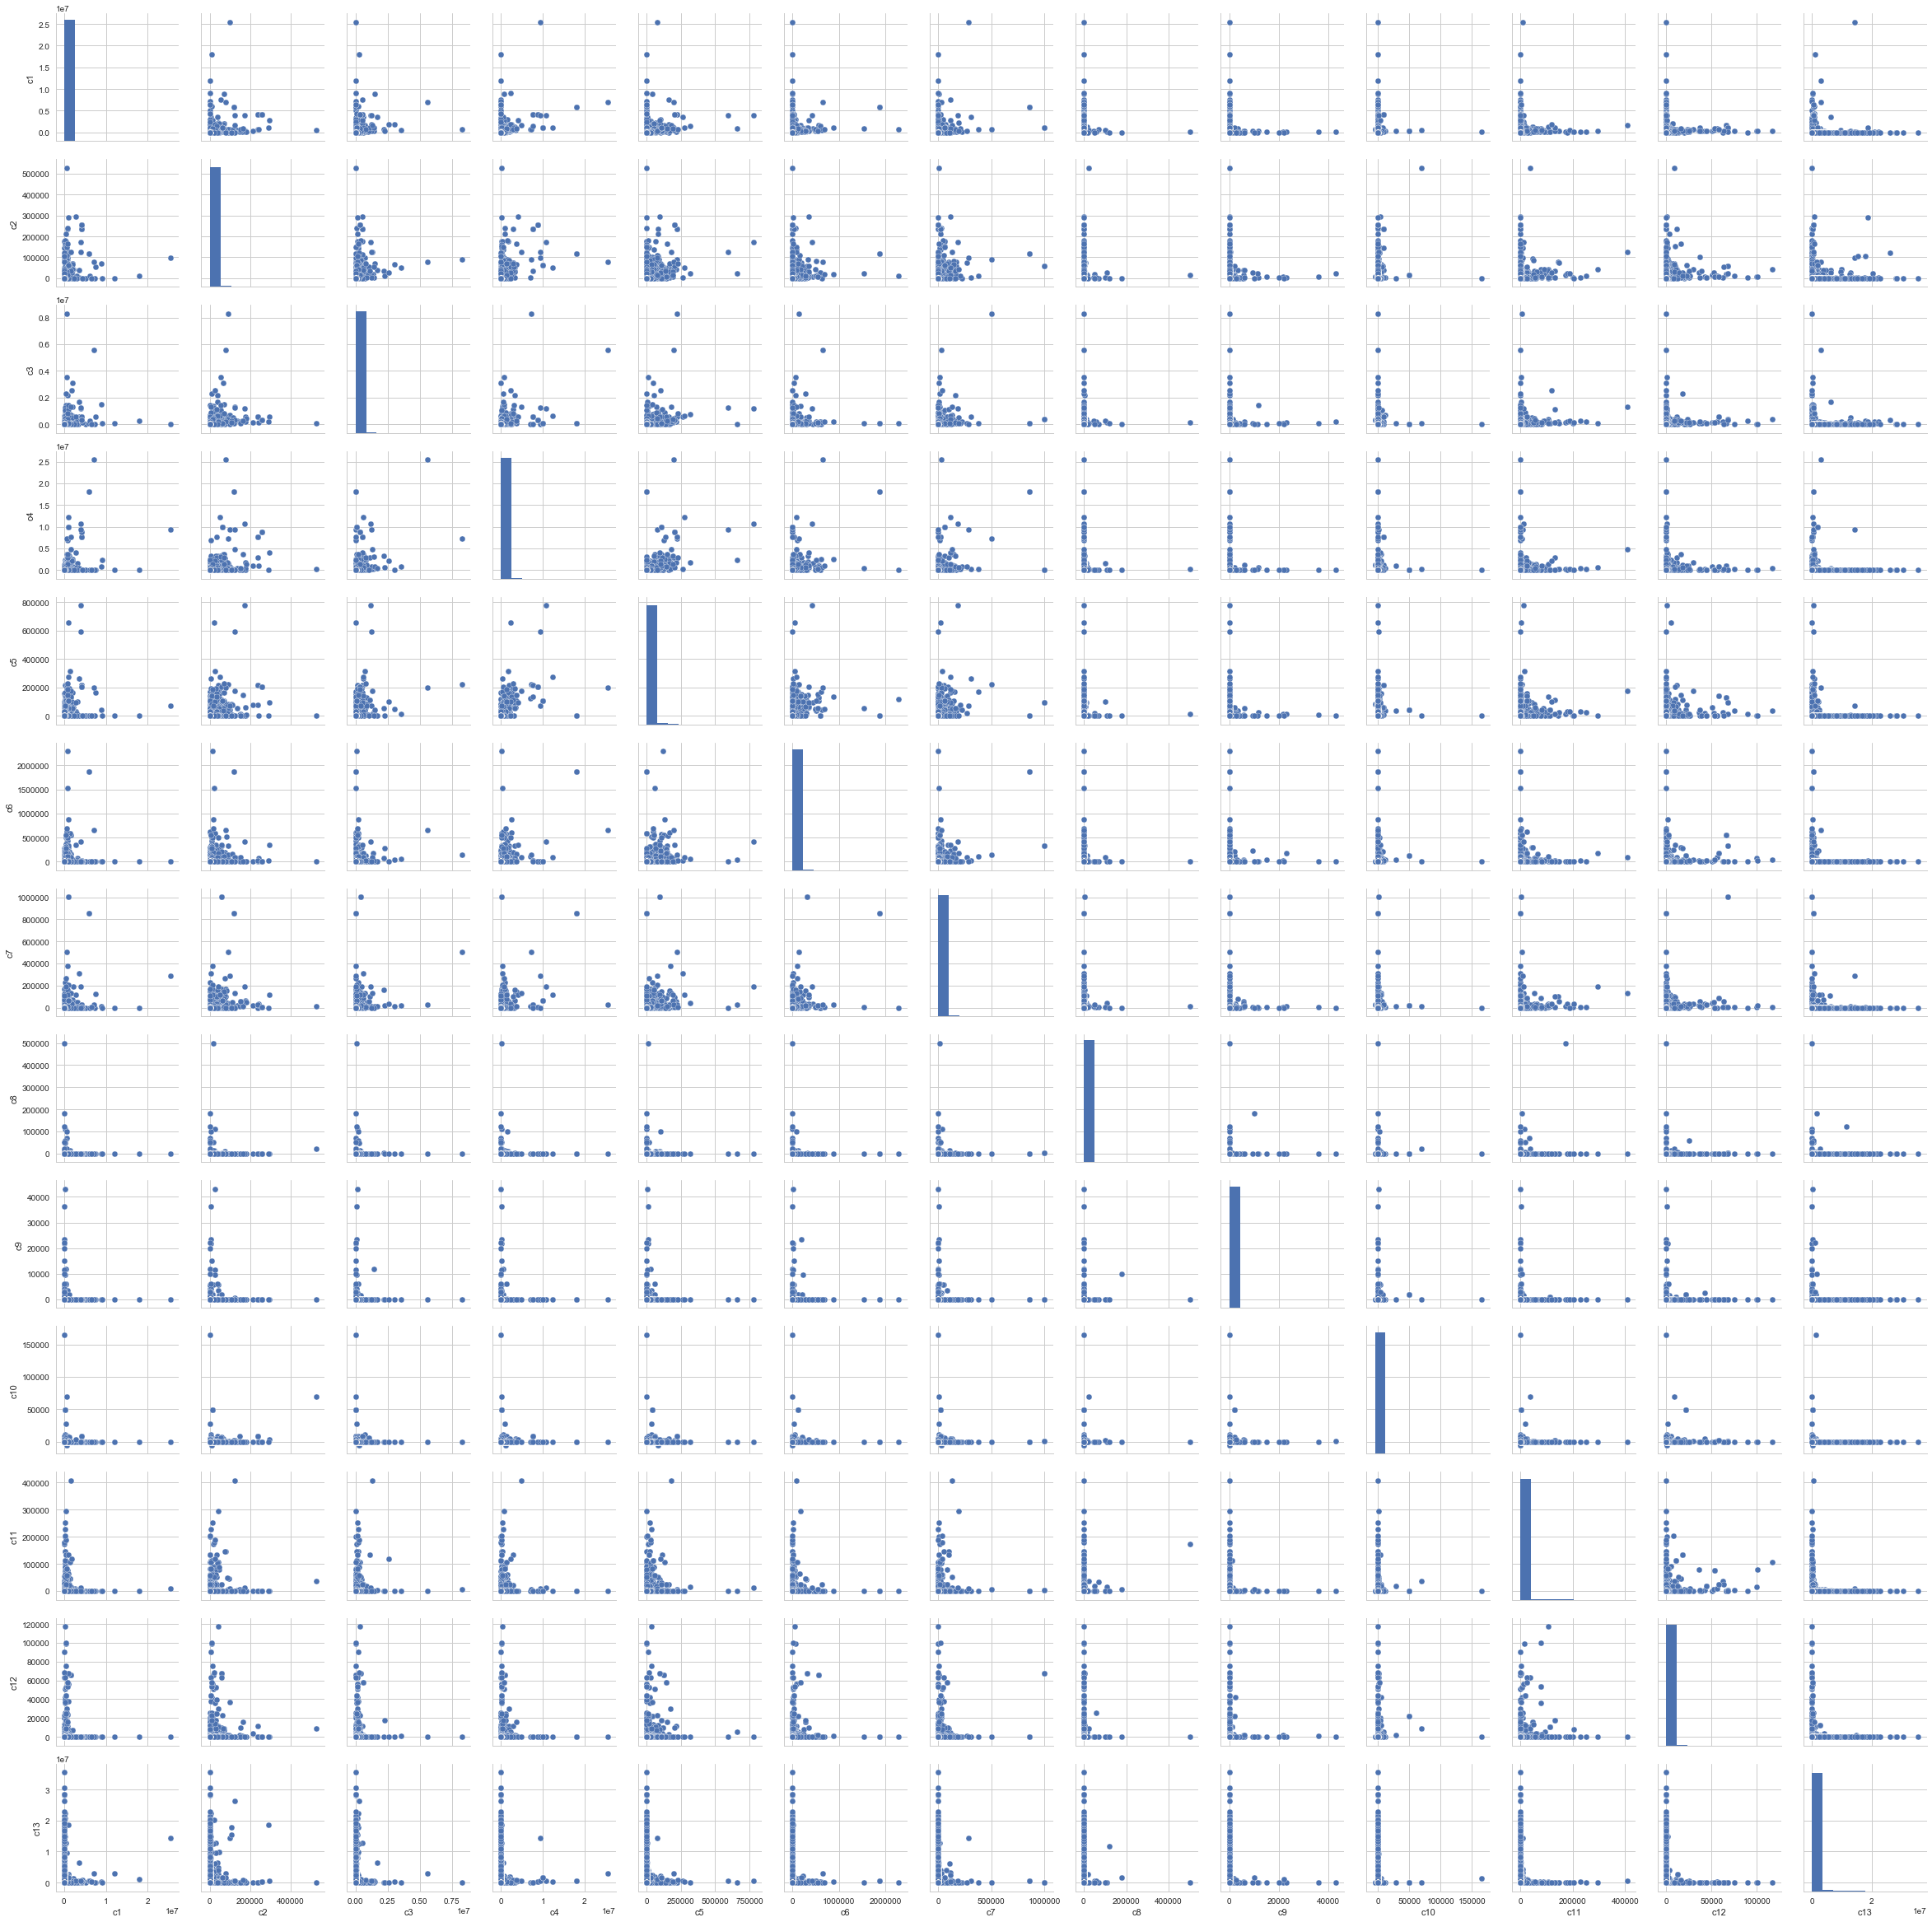

In [139]:
sns.pairplot(data=Gen[['c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12','c13']])
plt.show()

In [140]:
X.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13
5,11727.82,0.00,16964.09,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,666262.07
6,12132.25,0.00,16866.78,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,541474.45
14,54616.04,2343.79,71452.12,547321.04,27000.0,66857.04,9362.66,249.0,0.0,0.0,0.0,0.0,1626.96
15,54178.00,8154.95,121673.90,165131.27,17000.0,16138.18,9083.92,0.0,0.0,0.0,0.0,0.0,2321.95
16,15420.65,8540.32,91996.02,81481.66,15000.0,11833.66,2350.00,0.0,0.0,0.0,0.0,0.0,215.00


In [141]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


class EncodeCategorical(BaseEstimator, TransformerMixin):
    """
    Encodes a specified list of columns or all columns if None. 
    """
    
    def __init__(self, columns=None):
        self.columns  = [col for col in columns] 
        self.encoders = None
    
    def fit(self, data, target=None):
        """
        Expects a data frame with named columns to encode. 
        """
        # Encode all columns if columns is None
        if self.columns is None:
            self.columns = data.columns 
        
        # Fit a label encoder for each column in the data frame
        self.encoders = {
            column: LabelEncoder().fit(data[column])
            for column in self.columns 
        }
        return self

    def transform(self, data):
        """
        Uses the encoders to transform a data frame. 
        """
        output = data.copy()
        for column, encoder in self.encoders.items():
            output[column] = encoder.transform(data[column])
        
        return output

In [142]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline


def model_selection(X, y, estimator):
    """
    Test various estimators.
    """ 
    y = LabelEncoder().fit_transform(y.values.ravel())
    model = Pipeline([
         ('label_encoding', EncodeCategorical(X.keys())), 
         ('one_hot_encoder', OneHotEncoder()), 
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y)  
    
    expected  = y
    predicted = model.predict(X)
    
    # Compute and return the F1 score (the harmonic mean of precision and recall)
    return (f1_score(expected, predicted))

In [143]:
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

In [145]:
model_selection(X, y, LinearSVC())

ValueError: Target is multiclass but average='binary'. Please choose another average setting.

In [146]:
Winner.head()

,cand_id,cycle,c1,c2,c3,c4,c5,c6,c7,c8,...,incumbent,party,primary_votes,runoff_votes,general_votes,ge_runoff_election_votes,winner,total_votes,totalspend,costvote
5,H0AL02087,2012,11727.82,0.00,16964.09,0.00,0.0,0.00,0.00,0.0,...,1,R,0.0,0.0,180591.0,0.0,1,180591.0,694953.98,3.848220
6,H0AL02087,2014,12132.25,0.00,16866.78,0.00,0.0,0.00,0.00,0.0,...,1,R,0.0,0.0,113103.0,0.0,1,113103.0,570473.48,5.043840
14,H0AL05163,2010,54616.04,2343.79,71452.12,547321.04,27000.0,66857.04,9362.66,249.0,...,0,R,35746.0,0.0,131109.0,0.0,1,166855.0,780579.65,4.678192
15,H0AL05163,2012,54178.00,8154.95,121673.90,165131.27,17000.0,16138.18,9083.92,0.0,...,1,R,65163.0,0.0,189185.0,0.0,1,254348.0,393682.17,1.547809
16,H0AL05163,2014,15420.65,8540.32,91996.02,81481.66,15000.0,11833.66,2350.00,0.0,...,1,R,49117.0,0.0,115338.0,0.0,1,164455.0,226837.31,1.379328


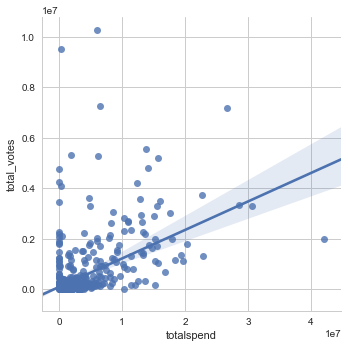

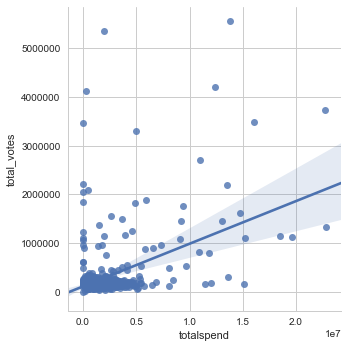

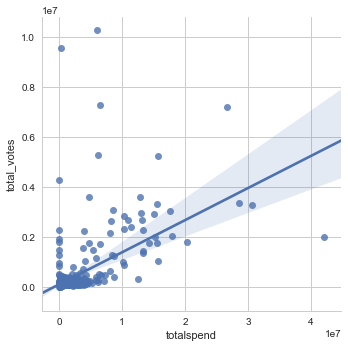

In [150]:
sns.lmplot(x='totalspend', y='total_votes', data=Winner)
sns.lmplot(x='totalspend', y='total_votes', data=RepW)
sns.lmplot(x='totalspend', y='total_votes', data=DemW)
plt.show()

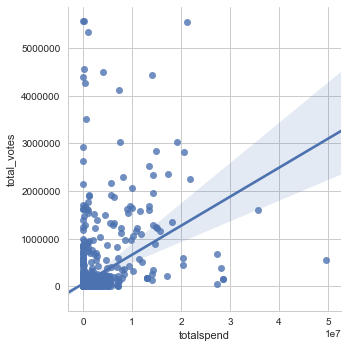

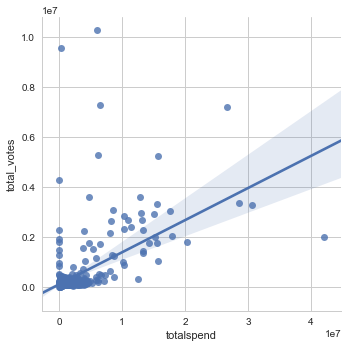

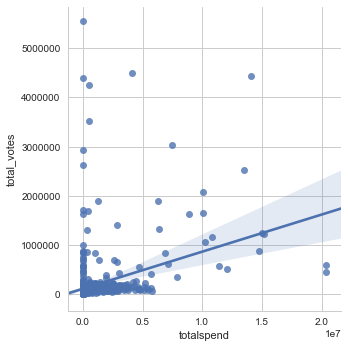

In [151]:
sns.lmplot(x='totalspend', y='total_votes', data=Loser)
sns.lmplot(x='totalspend', y='total_votes', data=DemW)
sns.lmplot(x='totalspend', y='total_votes', data=DemL)
plt.show()

In [152]:
Winner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2767 entries, 5 to 15915
Data columns (total 27 columns):
cand_id                     2767 non-null object
cycle                       2767 non-null object
c1                          2767 non-null float64
c2                          2767 non-null float64
c3                          2767 non-null float64
c4                          2767 non-null float64
c5                          2767 non-null float64
c6                          2767 non-null float64
c7                          2767 non-null float64
c8                          2767 non-null float64
c9                          2767 non-null float64
c10                         2767 non-null float64
c11                         2767 non-null float64
c12                         2767 non-null float64
c13                         2767 non-null float64
state_abbreviation          2767 non-null object
district                    2762 non-null object
incumbent                   2767 non-null obje

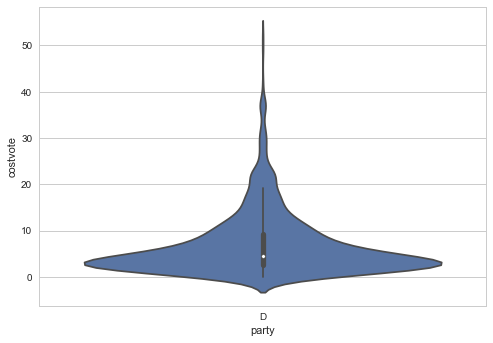

In [161]:
sns.violinplot(x='party', y='costvote', data=DemW, split=True, scale='count')
sns.plt.show()

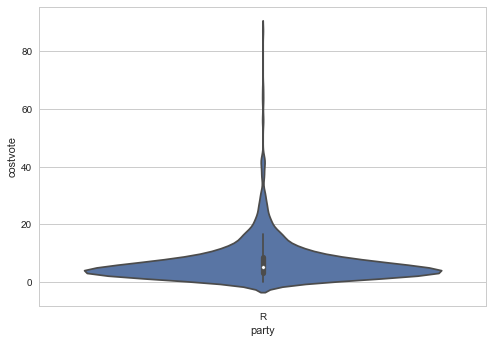

In [160]:
sns.violinplot(x='party', y='costvote', data=RepW, split=True, scale='count')
plt.show()

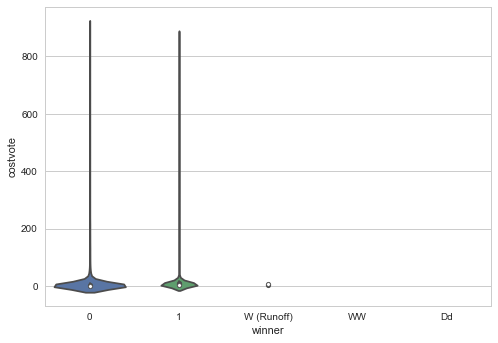

In [163]:
sns.violinplot(x='winner', y='costvote', data=Gen, split=True, scale='count')
sns.plt.show()

In [ ]:
sns.pairplot(RepW[['c1','c2','c3','c5','c6','c7','c8','c9','c10','c11','c12','c13','totalspend','costvote']], hue='winner', dropna=True)
plt.show()

In [167]:
Winner['party'].unique()

array(['R', 'D', 'WF', 'R ', 'REP ', 'REP\xa0', 'None', 'IDP', 'CRV',
       'DFL', 'R  ', 'DNL', 'R/TRP', 'D/WF', 'DEM ', 'R\xa0', 'NPP',
       'W(DEM)/DEM', 'DEM/PRO/WF', 'D/PRO/WF', 'D/WF/IDP Combined Parties',
       'IFM', 'REP/W', 'D/IND', 'D/IP', 'D/R', 'N', 'I', 'W (DEM)/DEM',
       'D\xa0', 'D  ', 'IND', 'DEM/CFL', 'REF'], dtype=object)

In [ ]:
Gen.loc[(df['party'] == some_value) & df['other_column'].isin(some_values)]